<a href="https://colab.research.google.com/github/ARoDias/DataMiningProject_CTCT_2024Analysis/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Data Preparation Stage



## Overview
This notebook is designed to process and analyze educational data related to various activities and their characteristics over multiple years. It utilizes Python for data manipulation, including creating pivot tables, generating summary statistics, and visualizing data through heatmaps. The code is organized into functions to enhance modularity and readability.

### Function Descriptions

#### `process_activities(dataset_params)`
This function processes activity data to create detailed and pivot tables:
- **Input:** A dictionary where each key represents a year and its value contains parameters, including an activity dictionary.
- **Process:** Iterates through each year, processes activities based on their characteristics (e.g., evaluation type, student grouping), and compiles them into a DataFrame.
- **Output:** Returns two DataFrames; one detailed (`activities_df`) and one summarized as a pivot table (`activities_pivot`).

#### `process_activities2(dataset_params)`
Similar to `process_activities`, but slightly varies in handling and summarization:
- **Output:** Provides a summarized DataFrame grouped by evaluation type and year, showing activity counts and lists (`summary_df2`).

#### Heatmap Visualization
Generates a heatmap from the pivot table to visually represent activity data across different characteristics and years.

#### `load_and_process_data(year, params)`
Loads and processes annual datasets based on provided parameters:
- **Process:** Includes reading files, filtering columns, handling missing values, and renaming columns for consistency.
- **Output:** Returns two datasets, one for students who passed and another for those who failed based on the grading criteria.

### Data Combination and Cleaning
- **Combine Datasets:** Combines passed and failed datasets for each year.
- **Clean Datasets:** Removes rows and columns that are completely empty across the dataset.

### Usage of Basic and Advanced List Generation Functions

#### `generate_basic_lists(dataset)`
Generates various lists categorizing the columns of a dataset, such as categorical columns, grade-related columns, and others based on their presence in the dataset.

#### `generate_weekly_and_participation_lists(dataset, listAsyncColumns)`
Creates lists for columns related to weekly data and participation points, facilitating detailed temporal analysis.

#### `generate_activity_type_lists(activities)`
Categorizes activities into multiple lists based on their types and characteristics, aiding in focused analyses of activity data.

### Comprehensive Data Processing and Reporting

#### `process_combined_datasets(cleaned_datasets, dataset_params)`
Integrates all list generation and data processing functions to create a structured summary of all lists and data characteristics for each year, aiding in comprehensive data analysis and decision-making.

### Presentation of Processed Data
- **Initial Display:** Shows the head of combined datasets for initial verification.
- **Student Count Reporting:** Reports the count of students participating in asynchronous and synchronous classes.
- **Numeric Type Setting and New Column Creation:** Converts relevant columns to numeric types and calculates totals for different activity and participation points.

### Additional Utilities
- Functions to create weekly and total datasets for deeper analysis.
- Functions to handle missing values and drop specific columns as needed.

This structured approach ensures that the educational data is thoroughly processed, analyzed, and ready for use in decision-making regarding educational strategies and interventions.

### Handling Outliers
The following functions manage and correct outliers in the dataset based on defined thresholds, although the dataset adjustments are not used in further analysis as zero grades are meaningful in this context.

#### `handle_outliers(data_dict)`
- **Description:** Adjusts outliers by capping them at the 1st and 99th percentiles for specific columns.
- **Input:** Dictionary of DataFrames keyed by year.
- **Process:** Calculates the interquartile range (IQR) for specified columns and replaces extreme outliers with percentile caps.
- **Output:** Returns the corrected datasets and a dictionary detailing the changes made to each column.

#### Outlier Detection and Reporting
- **Function:** `detect_changes(original_data, corrected_data)`
  - **Description:** Compares the original and corrected datasets to identify and document changes.
- **Implementation:** Iterates through each year and column, documenting any modifications due to outlier adjustments.

#### Printing Identified Outliers
- **Operation:** Iterates through each year's dataset to print details about high and low outliers in the 'Total_AP' column based on the computed thresholds.

### Data Verification and Correction
Ensures the dataset's structure and entries are aligned with expected activity characterizations.

#### `verify_and_correct_activities(dataset_complete, all_lists)`
- **Description:** Checks if the datasets include all expected activity types and identifies any uncharacterized or mislabeled activities.
- **Process:** Utilizes lists from `all_lists` to verify each activity's presence and characteristics against the dataset columns.

### Column Renaming and Updates
Updates column names for consistency across datasets based on year-specific rules.

#### `update_column_names(dataset_complete, all_lists)`
- **Description:** Applies renaming rules to datasets and updates lists of column names in `all_lists` to reflect these changes.
- **Details:** Specific rules are applied per year to correct historical naming inconsistencies or errors in column labeling.

### Course and Gender Standardization
Standardizes course names and gender representations across datasets to unify naming conventions and improve categorical analysis.

#### `combine_course_names(data)` and `standardize_sex_column(data)`
- **Combine Course Names:** Maps old course codes to new ones (e.g., 'MIEI' to 'LEI'), reflecting transitions from integrated masters to bachelors' programs.
- **Standardize Sex Column:** Converts numeric and abbreviated gender representations to full descriptive labels ('Male' or 'Female').

### Data Analysis and Saving
- **Analysis of Passed and Failed Students:** Segregates students based on their final grades and provides descriptive statistics for each group.
- **Save Processed Data:** Outputs all processed datasets and supportive information (e.g., `all_lists`) into Feather files and Python pickle files for persistent storage and easy retrieval.

### Final Remarks
The notebook concludes with comprehensive outputs for each dataset, ensuring all processed information is accurately recorded and available for subsequent educational research or administrative use.



## Importing Libraries

In [ ]:
# Core Libraries - Data manipulation and analysis
import pandas as pd  # Pandas for data manipulation via DataFrames
import numpy as np  # NumPy for numerical computing with support for large, multi-dimensional arrays and matrices

# Visualization Libraries
import matplotlib.pyplot as plt  # Matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn for statistical data visualization based on Matplotlib

# Machine Learning - Feature Selection and Preprocessing
from sklearn.feature_selection import VarianceThreshold  # Feature selector that removes all low-variance features
from sklearn.feature_selection import mutual_info_classif  # Feature selection technique that measures the dependency between variables

# Data Serialization
import pickle  # Pickle module for serializing and deserializing Python object structures
import os  # Provides a way of using operating system dependent functionality like reading or writing to the file system
import shutil  # High-level file operations like copying and removal

# Integration with Google Colaboratory
from google.colab import files  # Allows file upload and download in Google Colab environment

# Excel File Handling
import openpyxl  # Provides tools to read/write Excel 2010 xlsx/xlsm/xltx/xltm files


## File Handling Auxiliar Methods

In [ ]:
# Create output directories if they do not exist
os.makedirs('output/feather_files', exist_ok=True)
os.makedirs('output/csv_files', exist_ok=True)
os.makedirs('output/other_datasets', exist_ok=True)
os.makedirs('output/pickles', exist_ok=True)
os.makedirs('output/excel_files', exist_ok=True)

In [ ]:
# Function to save all variables and DataFrames
def save_all_variables_and_dataframes(filename='variables.pkl', excel_dir='./output/excel_files'):
    if not os.path.exists(excel_dir):
        os.makedirs(excel_dir)

    def is_pickleable(obj):
        try:
            pickle.dumps(obj)
            return True
        except (pickle.PicklingError, TypeError):
            return False

    all_variables = {k: v for k, v in globals().items() if not k.startswith('__') and not callable(v) and is_pickleable(v)}

    # Save DataFrames to Excel files
    for var_name, var_value in all_variables.items():
        if isinstance(var_value, pd.DataFrame):
            var_value.to_excel(os.path.join(excel_dir, f"{var_name}.xlsx"), index=True)
            print(f"DataFrame {var_name} saved as {var_name}.xlsx in {excel_dir}")

    # Save all variables except for non-pickleable objects
    with open(filename, 'wb') as f:
        pickle.dump(all_variables, f)
    print(f"All variables saved to {filename}")


In [ ]:
# Function to save dataframes to Feather format
def save_to_feather(datasets, directory):
    for name, df in datasets.items():
        # Remove duplicate columns if necessary
        df = df.loc[:, ~df.columns.duplicated()]
        # Feather format
        feather_path = os.path.join(directory, f'{name}.feather')
        df.reset_index(drop=True).to_feather(feather_path)

In [ ]:
# Function to save dataframes to CSV format
def save_to_csv(datasets, directory):
    for name, df in datasets.items():
        # Remove duplicate columns if necessary
        df = df.loc[:, ~df.columns.duplicated()]
        # CSV format
        csv_path = os.path.join(directory, f'{name}.csv')
        df.reset_index(drop=True).to_csv(csv_path, index=False)

## Datasets Parameters Definition

In [ ]:
dataset_params = {
    '2016': {
        'filename': 'CTCT201516_Notas.xlsx',
        'skiprows': 1,
        'cols2skip': [0],
        'last_col_range': 135,
        'commuting': 'missing',
        'failed_grade_value': '-',
        'freq_col': 'freq2016',
        'grade_col': 'NotaFinalDecPauta',
        'grade_integer_col': 'NotaFinalClip',
        'activity_dictionary': {
            # Column_name: (Activity_ID, Activity_Name, Type of Evaluation, Just for some students, Individual, Written, Homework, Thematic)
            '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_1': (3, 'Expectations regarding CTCT', 'B', 1, 1, 0, 0, ''),
            '1_2': (4, 'Online interview', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
            '1_3b': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_4a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
            '1_4b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '1_11': (12, 'Psychotechnical test (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_9': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_5': (14, 'Rank interviews', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_6': (16, 'Interview with volunteers (2 students)', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
            '1_12a': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
            '1_12b': (22, 'Assessment of the week gathering', 'B', 1, 1, 0, 0, ''),
            '1_8': (23, 'Bloco Livre', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_10': (24, 'Submission of CV on Moodle 2', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '2_1': (32, 'Submission of CV on Moodle', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
            '2_2a': (30, 'SMART goals', 'C', 0, 0, 1, 0, 'Time management'),
            '2_2b': (51, 'SMART goals (evaluate other group)', 'A', 0, 0, 1, 0, 'Time management'),
            '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
            '2_4': (52, 'Introduction to Google Calendar', 'A', 0, 0, 1, 0, 'Time management'),
            '2_6': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
            '2_7': (53, 'Email and Social Media Management', 'A', 0, 1, 1, 1, 'Time management'),
            '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
            '2_8b': (55, 'Forced landing (group) - column 3', 'A', 0, 0, 1, 0, 'Teamwork'),
            '2_8c': (56, 'Forced landing (group) - columns 5, 2 and 4', 'A', 0, 0, 1, 0, 'Teamwork'),
            '2_9': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
            '2_11': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
            '2_12b': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
            '2_12c': (23, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
            '2_13': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
            '2_15b': (58, 'Leadership Paradigms (Spokesperson)', 'B', 1, 1, 0, 0, 'Leadership'),
            '2_16': (23, 'Guess the number!', 'B', 1, 0, 0, 0, 'Teamwork'),
            '2_18a': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
            '2_18b': (54, 'Assessment of the week Gathering', 'B', 1, 1, 0, 0, ''),
            'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '3_1': (124, 'Excel Exercises 1 to 5', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
            '3_2': (125, 'Homework: clothes/colours', 'B', 0, 0, 1, 1, 'Advanced Excel use'),
            '3_3': (126, 'Programming f(x, y)', 'A', 0, 1, 1, 0, 'Advanced Excel use'),
            '3_4': (127, 'List of Insured Persons', 'C', 0, 0, 1, 1, 'Advanced Excel use'),
            '3_5': (128, 'School Planning', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
            '3_6': (129, 'Individual Test: VB Function', 'C', 0, 1, 1, 0, 'Advanced Excel use'),
            '3_7': (130, 'Moodle test Excel', 'C', 0, 1, 1, 1, 'Advanced Excel use'),
            '3_8a': (131, 'Evaluation of the week', 'A', 0, 0, 1, 0, ''),
            '3_8b': (132, 'Week b review', 'B', 1, 1, 0, 0, ''),
            'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '4_0': (83, 'Researches Privacy on social media', 'A', 0, 1, 1, 1, 'Information Searching'),
            '4_1': (84, 'Cybernauts strategies', 'NE', 0, 1, 0, 0, 'Information Searching'),
            '4_2': (85, 'Portuguese Manuscript Summary', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_3': (86, 'Summary correction', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_4a': (87, 'Structure of a report', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_4b': (88, 'Structure of a report (Spokesperson)', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '4_5': (89, 'Search at B-on complementary Famelab', 'B', 0, 0, 1, 1, 'Information Searching'),
            '4_6': (90, 'Synthesis of 3 documents', 'NE', 0, -1, 1, 1, 'Communication in science and technology'),
            '4_7': (91, 'Evaluation of synthesis groups A vs A', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_8a': (92, 'Student Behavior: Ethics', 'NE', 0, 0, 1, 0, 'Ethics and deontology'),
            '4_8b': (93, 'Student Behavior: Ethics (Spokesperson)', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
            '4_9': (72, 'Ethical dilemmas', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
            '4_10': (94, 'Moodle Questionnaire', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
            '5_1': (95, 'Draw figures = What is the message? (66)', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
            '5_2': (96, 'Portuguese Manuscript Summary', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '5_3': (97, 'Manuscript Summary / Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_4a': (98, 'Oral Communication Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
            '5_4b': (99, 'Poster Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
            '5_5': (100, 'News preparation', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
            '5_6': (101, 'Newscast Presentation', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_7': (102, 'Presentation of Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_8': (77, 'Communication using audiovisual media - Posters', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_9': (103, 'Group evaluation of the presentation given by Spokespersons', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
            'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '5_10': (104, 'Assessment of the week (5th week)', 'A', 0, 0, 1, 0, ''),
            '5_11a': (105, 'Global evaluation of the discipline (written)', 'A', 0, 0, 1, 0, ''),
            '5_11b': (106, 'Global evaluation of the discipline (oral)', 'B', 1, 1, 0, 0, ''),
        }
    },
    '2017': {
        'filename': 'CTCT201617_Notas.xlsx',
        'skiprows': 1,
        'cols2skip': [0, 1],
        'last_col_range': 136,
        'commuting': 'EDESLOCADO',
        'failed_grade_value': '---',
        'freq_col': 'Freq201617',
        'grade_col': 'Val_Tot_Pauta',
        'grade_integer_col': 'NotaFinal',
        'activity_dictionary': {
            '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_1': (3, 'Expectations regarding CTCT', 'A', 1, 1, 0, 0, ''),
            '1_2': (4, 'Online interview', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
            '1_3b': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_4a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
            '1_4b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '1_11': (12, 'Psychotechnical test (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '1_9': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_5': (14, 'Rank interviews', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_6': (16, 'Interview with volunteers (2 students)', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
            '1_12a': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
            '1_12b': (22, 'Assessment of the week gathering', 'B', 1, 1, 0, 0, ''),
            '1_8': (23, 'Bloco Livre', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
            '1_10': (24, 'Submission of CV on Moodle 2', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
            '2_1': (32, 'Submission of CV on Moodle', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
            '2_2a': (30, 'SMART goals', 'C', 0, 0, 1, 0, 'Time management'),
            '2_2b': (51, 'SMART goals (evaluate other group)', 'A', 0, 0, 1, 0, 'Time management'),
            '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
            '2_4': (52, 'Introduction to Google Calendar', 'A', 0, 0, 1, 0, 'Time management'),
            '2_6': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
            '2_7': (53, 'Email and Social Media Management', 'A', 0, 1, 1, 1, 'Time management'),
            '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
            '2_8b': (55, 'Forced landing (group) - column 3', 'A', 0, 0, 1, 0, 'Teamwork'),
            '2_8c': (56, 'Forced landing (group) - columns 5, 2 and 4', 'A', 0, 0, 1, 0, 'Teamwork'),
            '2_9': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
            '2_11': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
            '2_12b': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
            '2_12c': (23, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
            '2_13': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
            '2_15b': (58, 'Leadership Paradigms (Spokesperson)', 'B', 1, 1, 0, 0, 'Leadership'),
            '2_16': (23, 'Guess the number!', 'B', 1, 0, 0, 0, 'Teamwork'),
            '2_18a': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
            '2_18b': (54, 'Assessment of the week Gathering', 'B', 1, 1, 0, 0, ''),
            'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '3_1': (124, 'Excel Exercises 1 to 5', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
            '3_2': (125, 'Homework: clothes/colours', 'B', 0, 0, 1, 1, 'Advanced Excel use'),
            '3_3': (126, 'Programming f(x, y)', 'A', 0, 1, 1, 0, 'Advanced Excel use'),
            '3_4': (127, 'List of Insured Persons', 'C', 0, 0, 1, 1, 'Advanced Excel use'),
            '3_5': (128, 'School Planning', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
            '3_6': (129, 'Individual Test: VB Function', 'C', 0, 1, 1, 0, 'Advanced Excel use'),
            '3_7': (130, 'Moodle test Excel', 'C', 0, 1, 1, 1, 'Advanced Excel use'),
            '3_8a': (131, 'Evaluation of the week', 'A', 0, 0, 1, 0, ''),
            '3_8b': (132, 'Week b review', 'B', 1, 1, 0, 0, ''),
            'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '4_0': (83, 'Researches Privacy on social media', 'A', 0, 1, 1, 1, 'Information Searching'),
            '4_1': (84, 'Cybernauts strategies', 'NE', 0, 1, 0, 0, 'Information Searching'),
            '4_2': (85, 'Portuguese Manuscript Summary', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_3': (86, 'Summary correction', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_4a': (87, 'Structure of a report', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_4b': (88, 'Structure of a report (Spokesperson)', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '4_5': (89, 'Search at B-on complementary Famelab', 'B', 0, 0, 1, 1, 'Information Searching'),
            '4_6': (90, 'Synthesis of 3 documents', 'NE', 0, -1, 1, 1, 'Communication in science and technology'),
            '4_7': (91, 'Evaluation of synthesis groups A vs A', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
            '4_8a': (92, 'Student Behavior: Ethics', 'NE', 0, 0, 1, 0, 'Ethics and deontology'),
            '4_8b': (93, 'Student Behavior: Ethics (Spokesperson)', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
            '4_9a': (72, 'Ethical dilemmas', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
            '4_9b': (72, 'Ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
            '4_10': (94, 'Assessment of the Week', 'A', 0, 0, 1, 0, ''),
            '4_11': (94, 'Moodle Questionnaire', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
            '5_1': (95, 'Draw figures = What is the message? (66)', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
            '5_2': (96, 'Portuguese Manuscript Summary', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
            '5_3': (97, 'Manuscript Summary / Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_4a': (98, 'Oral Communication Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
            '5_4b': (99, 'Poster Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
            '5_5': (100, 'News preparation', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
            '5_6': (101, 'Newscast Presentation', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_7': (102, 'Presentation of Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_8': (77, 'Communication using audiovisual media - Posters', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
            '5_9': (103, 'Group evaluation of the presentation given by Spokespersons', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
            'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
            '5_10': (104, 'Assessment of the week (5th week)', 'A', 0, 0, 1, 0, ''),
            '5_11b': (106, 'Global evaluation of the discipline (oral)', 'B', 1, 1, 0, 0, ''),
        }
    },
'2018': {
    'filename': 'CTCT201718_Notas.xlsx',
    'skiprows': 1,
    'cols2skip': [0, 1],
    'last_col_range': 142,
    'commuting': 'DESLOCADO',
    'failed_grade_value': '---',
    'freq_col': 'Freq201718',
    'grade_col': 'Val_Tot_Pauta',
    'grade_integer_col': 'NotaFinal',
    'activity_dictionary': {
        '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_1': (3, 'Expectations regarding CTCT', 'A', 1, 1, 0, 0, ''),
        '1_2': (4, 'Online interview', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_3b': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_4a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_4b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '1_11': (12, 'Psychotechnical test (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_9': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_5': (14, 'Rank interviews', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_6': (16, 'Interview with volunteers (2 students)', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_12a': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        '1_12b': (22, 'Assessment of the week gathering', 'B', 1, 1, 0, 0, ''),
        '1_8': (23, 'Bloco Livre', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_10': (24, 'Submission of CV on Moodle 2', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '2_1': (32, 'Submission of CV on Moodle', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '2_2a': (30, 'SMART goals', 'C', 0, 0, 1, 0, 'Time management'),
        '2_2b': (51, 'SMART goals (evaluate other group)', 'A', 0, 0, 1, 0, 'Time management'),
        '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
        '2_4': (52, 'Introduction to Google Calendar', 'A', 0, 0, 1, 0, 'Time management'),
        '2_6': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_7': (53, 'Email and Social Media Management', 'A', 0, 1, 1, 1, 'Time management'),
        '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
        '2_8b': (55, 'Forced landing (group) - column 3', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_8c': (56, 'Forced landing (group) - columns 5, 2 and 4', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_9': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_11': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_12b': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
        '2_12c': (23, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_13': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
        '2_15b': (58, 'Leadership Paradigms (Spokesperson)', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_16': (23, 'Guess the number!', 'B', 1, 0, 0, 0, 'Teamwork'),
        '2_18a': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        '2_18b': (54, 'Assessment of the week Gathering', 'B', 1, 1, 0, 0, ''),
        'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '3_1': (124, 'Excel Exercises 1 to 5', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_2': (125, 'Homework: clothes/colours', 'A', 0, 0, 1, 1, 'Advanced Excel use'),
        '3_3': (126, 'Programming f(x, y)', 'A', 0, 1, 1, 0, 'Advanced Excel use'),
        '3_4': (127, 'List of Insured Persons', 'C', 0, 0, 1, 1, 'Advanced Excel use'),
        '3_5': (128, 'School Planning', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_6': (129, 'Individual Test: VB Function', 'C', 0, 1, 1, 0, 'Advanced Excel use'),
        '3_7': (130, 'Moodle test Excel', 'C', 0, 1, 1, 1, 'Advanced Excel use'),
        '3_8a': (131, 'Evaluation of the week', 'A', 0, 0, 1, 0, ''),
        '3_8b': (132, 'Week b review', 'B', 1, 1, 0, 0, ''),
        'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '4_0': (83, 'Researches Privacy on social media', 'A', 0, 1, 1, 1, 'Information Searching'),
        '4_1': (84, 'Cybernauts strategies', 'NE', 0, 1, 0, 0, 'Information Searching'),
        '4_2': (85, 'Portuguese Manuscript Summary', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_3': (86, 'Summary correction', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_4a': (87, 'Structure of a report', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_4b': (88, 'Structure of a report (Spokesperson)', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '4_5': (89, 'Search at B-on complementary Famelab', 'B', 0, 0, 1, 1, 'Information Searching'),
        '4_6': (90, 'Synthesis of 3 documents', 'NE', 0, -1, 1, 1, 'Communication in science and technology'),
       '4_7': (91, 'Evaluation of synthesis groups A vs A', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
'4_8a': (92, 'Student Behavior: Ethics', 'NE', 0, 0, 1, 0, 'Ethics and deontology'),
'4_8b': (93, 'Student Behavior: Ethics (Spokesperson)', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
'4_9a': (72, 'Ethical dilemmas', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
'4_9b': (72, 'Ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
'4_10': (94, 'Assessment of the Week', 'A', 0, 0, 1, 0, ''),
'4_11': (94, 'Moodle Questionnaire', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
'5_1': (95, 'Draw figures = What is the message? (66)', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
'5_2': (96, 'Portuguese Manuscript Summary', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
'5_3': (97, 'Manuscript Summary / Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
'5_4a': (98, 'Oral Communication Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
'5_4b': (99, 'Poster Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
'5_5': (100, 'News preparation', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
'5_6': (101, 'Newscast Presentation', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
'5_7': (102, 'Presentation of Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
'5_8': (77, 'Communication using audiovisual media - Posters', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
'5_9': (103, 'Group evaluation of the presentation given by Spokespersons', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
'5_10': (104, 'Assessment of the week (5th week)', 'A', 0, 0, 1, 0, ''),
#'5_11a': (105, 'Global evaluation of the discipline (written)', 'A', 0, 0, 1, 0, ''),
'5_11b': (106, 'Global evaluation of the discipline (oral)', 'B', 1, 1, 0, 0, ''),
}
},
'2019': {
    'filename': 'CTCT201819_Notas.xlsx',
    'skiprows': 1,
    'cols2skip': [0, 1],
    'last_col_range': 143,
    'commuting': 'DESLOCADO',
    'failed_grade_value': '---',
    'freq_col': 'missing',
    'grade_col': 'Val_Tot_Pauta',
    'grade_integer_col': 'NotaFinal',
    'activity_dictionary': {
        '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_1': (3, 'Expectations regarding CTCT', 'A', 1, 1, 0, 0, ''),
        '1_2': (4, 'Online interview', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_3b': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_4a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_4b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '1_7': (12, 'Psychotechnical test (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_8': (26, 'Print Curricular Plan', 'NE', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_10': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_5': (14, 'Rank interviews', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_6': (16, 'Interview with volunteers (2 students)', 'B', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_12a': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        '1_12b': (22, 'Assessment of the week gathering', 'B', 1, 1, 0, 0, ''),
        '1_11': (24, 'Submission of CV on Moodle 2', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '2_1': (32, 'Submission of CV on Moodle', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '2_2a': (30, 'SMART goals', 'C', 0, 0, 1, 0, 'Time management'),
        '2_2b': (51, 'SMART goals (evaluate other group)', 'A', 0, 0, 1, 0, 'Time management'),
        '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
        '2_4': (52, 'Introduction to Google Calendar', 'A', 0, 0, 1, 0, 'Time management'),
        '2_6': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_7': (53, 'Email and Social Media Management', 'A', 0, 1, 1, 1, 'Time management'),
        '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
        '2_8b': (55, 'Forced landing (group) - column 3', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_8c': (56, 'Forced landing (group) - columns 5, 2 and 4', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_9': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_11': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_12b': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
        '2_12c': (23, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_13': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
        '2_15b': (58, 'Leadership Paradigms (Spokesperson)', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_16': (23, 'Guess the number!', 'B', 1, 0, 0, 0, 'Teamwork'),
        '2_18a': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        '2_18b': (54, 'Assessment of the week Gathering', 'B', 1, 1, 0, 0, ''),
        'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '3_1': (124, 'Excel Exercises 1 to 5', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_2': (125, 'Homework: clothes/colours', 'B', 0, 0, 1, 1, 'Advanced Excel use'),
        '3_3': (126, 'Programming f(x, y)', 'A', 0, 1, 1, 0, 'Advanced Excel use'),
        '3_4': (127, 'List of Insured Persons', 'C', 0, 0, 1, 1, 'Advanced Excel use'),
        '3_5': (128, 'School Planning', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_6': (129, 'Individual Test: VB Function', 'C', 0, 1, 1, 0, 'Advanced Excel use'),
        '3_7': (130, 'Moodle test Excel', 'C', 0, 1, 1, 1, 'Advanced Excel use'),
        '3_8a': (131, 'Evaluation of the week', 'A', 0, 0, 1, 0, ''),
        '3_8b': (132, 'Week b review', 'B', 1, 1, 0, 0, ''),
        'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '4_0': (83, 'Researches Privacy on social media', 'A', 0, 1, 1, 1, 'Information Searching'),
        '4_1': (84, 'Cybernauts strategies', 'NE', 0, -1, 0, 0, 'Information Searching'),
        '4_2': (85, 'Portuguese Manuscript Summary', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_3': (86, 'Summary correction', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_4a': (87, 'Structure of a report', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_4b': (88, 'Structure of a report (Spokesperson)', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '4_5': (89, 'Search at B-on complementary Famelab', 'B', 0, 0, 1, 1, 'Information Searching'),
        '4_6': (90, 'Synthesis of 3 documents', 'NE', 0, -1, 1, 1, 'Communication in science and technology'),
        '4_7': (91, 'Evaluation of synthesis groups A vs A', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
        '4_8a': (92, 'Student Behavior: Ethics', 'NE', 0, 0, 1, 0, 'Ethics and deontology'),
        '4_8b': (93, 'Student Behavior: Ethics (Spokesperson)', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
        '4_9a': (72, 'Ethical dilemmas', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
        '4_9b': (72, 'Ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
        '4_10': (94, 'Assessment of the Week', 'A', 0, 0, 1, 0, ''),
        '4_11': (94, 'Moodle Questionnaire', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
        '5_1': (95, 'Draw figures = What is the message? (66)', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '5_2': (96, 'Portuguese Manuscript Summary', 'B', 0, 0, 1, 0, 'Communication in science and technology'),
        '5_3': (97, 'Manuscript Summary / Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '5_4a': (98, 'Oral Communication Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
        '5_4b': (99, 'Poster Preparation', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
        '5_5': (100, 'News preparation', 'NE', 0, 0, 1, 0, 'Communication in science and technology'),
        '5_6': (101, 'Newscast Presentation', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '5_7': (102, 'Presentation of Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '5_8': (77, 'Communication using audiovisual media - Posters', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '5_9': (103, 'Group evaluation of the presentation given by Spokespersons', 'C', 0, 0, 1, 0, 'Communication in science and technology'),
        'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '5_10': (104, 'Assessment of the week (5th week)', 'A', 0, 0, 1, 0, ''),
        '5_11b': (106, 'Global evaluation of the discipline (oral)', 'B', 1, 1, 0, 0, ''),
    }
},
'2022': {
    'filename': 'CTCT202122_Notas.xlsx',
    'skiprows': 2,
    'cols2skip': [0, 1],
    'last_col_range': 93,
    'commuting': 'DESLOCADO',
    'failed_grade_value': '-',
    'freq_col': 'Freq2122',
    'grade_col': 'Valor3',
    'grade_integer_col': 'NotaFinal',
    'activity_dictionary': {
        '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_1': (3, 'Expectations regarding CTCT', 'P', 1, 1, 0, 0, ''),
        '1_2': (4, 'Online interview', 'P', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_4': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_5a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_5b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '1_6': (12, 'Psychotechnical test (Moodle)', 'B', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_7': (13, 'CV Election','NE', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_8': (15, 'Publicly present your analysis of the interviews.', 'B', 1, 0, 0, 0, 'Communication in science and technology'),
        '1_9': (16, 'Interview with volunteers (2 students)', 'P', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_10': (141, 'Course Curriculum Plan', 'NE', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_11': (17, 'Choose 3 skills to develop during the course.', 'NE', 0, 0, 1, 0, ''),
        '1_12': (23, 'Bloco Livre', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_13a': (133, 'Is it worth going on Erasmus? (Group)', 'A', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_13b': (134, 'Public Presentation on Erasmus+ (5 groups, oral)', 'B', 1, 0, 0, 0, 'Communication in science and technology'),
        '1_13c': (135, 'Plan your Erasmus+ semester (individual for everyone, written, tpc)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_14': (19, 'Additional skills to develop? (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_15': (136, 'Share the plan for Erasmus (activity 135)', 'NE', 0, 0, 0, 0, ''),
        '1_16a': (137, 'Choose a MOOC course', 'A', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_16b': (138, 'Presentation of choosing the MOOC course', 'B', 1, 0, 0, 0, 'Communication in science and technology'),
        '1_17': (32, 'Project execution', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_18a': (144, 'Introduction to Google Calendar (Individual, Class)', 'A', 0, 1, 0, 0, 'Time management'),
        '1_18b': (139, 'Introduction to Google Calendar (Group)', 'A', 0, 0, 1, 0, 'Time management'),
        '1_19': (140, 'Introduction to Google Tasks (individual for everyone, written)', 'A', 0, 1, 1, 0, 'Time management'),
        '1_20': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '2_0': (27, 'Time management survey on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_1': (29, 'Raising awareness of time management language', 'A', 0, 0, 1, 0, 'Time management'),
        '2_2': (30, 'SMART goals', 'B', 0, 0, 1, 0, 'Time management'),
        '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
        '2_4': (33, 'Systematic procrastination', 'B', 0, 1, 1, 1, 'Time management'),
        '2_5a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
        '2_5b': (37, 'Forced landing - group', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_6': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_7': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_8': (44, 'What kind of leader am I?', 'A', 0, 1, 1, 0, 'Leadership'),
        '2_9a': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
        '2_9b': (43, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_10': (47, 'Guess the number!', 'NE', 1, 0, 0, 0, 'Teamwork'),
        '2_11': (145, 'O nosso texto', 'NE', 0, 0, 1, 1, 'Communication in science and technology'),
        '2_12': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
        '2_13': (45, 'Active listening', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_14': (46, 'Positive language', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_15': (69, 'Ethics and Corruption', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '2_16': (70, 'Turnitin submission', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '2_17': (71, 'Code of Honor for FCT', 'B', 0, 1, 1, 0, 'Ethics and deontology'),
        '2_18a': (72, 'Ethical dilemmas', 'A', 0, 0, 1, 0, 'Ethics and deontology'),
        '2_18b': (73, 'Presentation of ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
        '2_19': (49, 'Quizz: Teamwork and Leadership', 'A', 0, 1, 1, 1, 'Teamwork'),
        '2_20': (75, 'Turnitin report analysis', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
        '2_21': (66, 'What is the message?', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_22a': (63, 'Inserting references in Mendeley', 'A', 0, 0, 1, 0, 'Information Searching'),
        '2_22b': (64, 'Mendeley in Word', 'B', 0, 0, 1, 0, 'Information Searching'),
        '2_23': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '3_1': (108, 'Improving trendline fitting', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_2': (109, 'Exercise 2: Cell programming', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_3': (110, 'Exercise 3: Cell programming: IF and AND/OR commands', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_4': (111, 'Distribution of states by fruit', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_5': (112, 'Distribution of fruits / states / calibers', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_6': (113, 'Counting commands (association questions)', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_7': (114, 'Passenger luggage arriving at the airport', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_8': (115, 'Function formatting', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_9': (116, 'Order processing', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_10': (117, 'Purchase of computer equipment (Solver)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_11': (118, 'Excel and Visual Basic (Questions)', 'B', 0, 1, 1, 1, 'Advanced Excel use'),
        '3_12c': (142, 'The color of the notebook (VB Programming)', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_12p': (119, 'Class schedule processing (with macros)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_13': (120, 'Individual Written Assessment of Excel and Visual Basic', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '3_14': (122, 'Course and week assessment', 'A', 0, 0, 1, 0, ''),
        'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
    }
},
'2023': {
    'filename': 'CTCT202223_Notas.xlsx',
    'skiprows': 2,
    'cols2skip': [0, 1],
    'last_col_range': 104,
    'commuting': 'DESLOCADO',
    'failed_grade_value': '-',
    'freq_col': 'Freq202223',
    'grade_col': 'VFinalPauta',
    'grade_integer_col': 'NFinal_Pauta',
    'activity_dictionary': {
        '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_1': (3, 'Expectations regarding CTCT', 'P', 1, 1, 0, 0, ''),
        '1_2': (4, 'Online interview', 'P', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_3': (6, 'Icebreaker activity', 'NE', 0, 0, 0, 0, ''),
        '1_4': (7, 'The CV of John', 'A', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_5': (25, 'Submission of short CV & Cover Letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_6a': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_6b': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '1_7': (12, 'Psychotechnical test (Moodle)', 'B', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_8': (13, 'CV Election', 'NE', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_9': (15, 'Publicly present your analysis of the interviews.', 'B', 1, 0, 0, 0, 'Communication in science and technology'),
        '1_10': (16, 'Interview with volunteers (2 students)', 'P', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_11': (17, 'Choose 3 skills to develop during the course.', 'NE', 0, 0, 1, 0, ''),
        '1_12': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_13': (19, 'Additional skills to develop? (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_14': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '2_0a': (27, 'Time management survey on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_0b': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_1': (29, 'Raising awareness of time management language', 'A', 0, 0, 1, 0, 'Time management'),
        '2_2': (30, 'SMART goals', 'B', 0, 0, 1, 0, 'Time management'),
        '2_3a': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
        '2_3b': (147, 'Do you know Flippity?', 'A', 0, 1, 1, 1, 'Time management'),
        '2_4': (32, 'Project execution', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '2_5': (33, 'Systematic procrastination', 'B', 0, 1, 1, 1, 'Time management'),
        '2_6': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_7': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
        '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
        '2_8b': (37, 'Forced landing - group', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_9': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_10': (47, 'Guess the number!', 'NE', 1, 0, 0, 0, 'Teamwork'),
        '2_11': (39, 'After Teamwork, we highlight...', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_12': (49, 'Quizz: Teamwork and Leadership', 'A', 0, 1, 1, 1, 'Teamwork'),
        '2_13': (41, 'Leader - behaviors and characteristics', 'B', 0, 0, 1, 0, 'Leadership'),
        '2_14a': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
        '2_14b': (43, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_15': (44, 'What kind of leader am I?', 'A', 0, 1, 1, 0, 'Leadership'),
        '2_16': (45, 'Active listening', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_17': (46, 'Positive language', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_18': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '3_0a': (59, 'Mendeley Reference Manager installation', 'A', 0, 1, 1, 1, 'Information Searching'),
        '3_0b': (60, 'Questionnaire about information management and communication', 'A', 0, 1, 1, 1, 'Information Searching'),
        '3_1': (61, 'Information search about...', 'A', 0, 0, 1, 0, 'Information Searching'),
        '3_2': (62, 'Work summary', 'B', 0, 0, 1, 0, 'Information Searching'),
        '3_3': (146, 'Quizz: citations and referencing', 'B', 0, 0, 1, 0, 'Information Searching'),
        '3_4': (63, 'Inserting references in Mendeley', 'A', 0, 0, 1, 0, 'Information Searching'),
        '3_5': (64, 'Mendeley in Word', 'B', 0, 0, 1, 0, 'Information Searching'),
        '3_6': (65, 'Synthesis', 'B', 0, 1, 1, 1, 'Communication in science and technology'),
        '3_7': (66, 'What is the message?', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '3_8a': (76, 'Communication using audiovisual media - Slides', 'C', 0, 0, 0, 0, 'Communication in science and technology'),
        '3_8b': (77, 'Communication using audiovisual media - Posters', 'C', 0, 0, 0, 0, 'Communication in science and technology'),
        '3_9': (68, 'Ethics. Case studies', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_10': (69, 'Ethics and Corruption', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_11': (70, 'Turnitin submission', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_12': (71, 'Code of Honor for FCT', 'B', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_13a': (72, 'Ethical dilemmas', 'A', 0, 0, 1, 0, 'Ethics and deontology'),
        '3_13b': (73, 'Presentation of ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
        '3_14': (74, 'Questionnaire about ethics', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
        '3_15': (75, 'Turnitin report analysis', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
        '3_16': (82, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '4_0a': (107, 'Excel configuration', 'NE', 0, 1, 1, 1, 'Advanced Excel use'),
        '4_1': (108, 'Improving trendline fitting', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_2': (109, 'Exercise 2: Cell programming', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_3': (110, 'Exercise 3: Cell programming: IF and AND/OR commands', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_4': (111, 'Distribution of states by fruit', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_5': (112, 'Distribution of fruits / states / calibers', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_6': (113, 'Counting commands (association questions)', 'B', 0, 1, 1, 0, 'Advanced Excel use'),
        '4_7': (114, 'Passenger luggage arriving at the airport', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_8': (115, 'Function formatting', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_9': (116, 'Order processing', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_10': (117, 'Purchase of computer equipment (Solver)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_11': (118, 'Excel and Visual Basic (Questions)', 'B', 0, 1, 1, 1, 'Advanced Excel use'),
        '4_12': (119, 'Class schedule processing (with macros)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_13': (120, 'Individual Written Assessment of Excel and Visual Basic', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_14': (122, 'Course and week assessment', 'A', 0, 0, 1, 0, ''),
        '4_15': (122, 'Course and week assessment', 'A', 0, 0, 1, 0, ''),
        'SPA4': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
    }
},
'2024': {
    'filename': 'CTCT202324_Notas.xlsx',
    'skiprows': 2,
    'cols2skip': [0, 1],
    'last_col_range': 107,
    'commuting': 'DESLOCADO',
    'failed_grade_value': '-',
    'freq_col': 'Freq202324',
    'grade_col': 'VFinalPauta',
    'grade_integer_col': 'NFinal_Pauta',
    'activity_dictionary': {
        '1_0': (1, 'Submission of CV on Moodle', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_1': (2, 'Diagnostic questionnaire on transversal skills', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_2': (5, 'Using Moodle', 'A', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_3': (6, 'Icebreaker activity', 'NE', 0, 0, 0, 0, ''),
        '1_4': (7, 'The CV of John', 'A', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_5': (8, 'Submission of short CV', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_6': (9, 'Submission of cover letter', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_7': (10, 'Analysis of 3 CVs of candidates', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '1_8': (11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology'),
        '1_9': (12, 'Psychotechnical test (Moodle)', 'B', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_10': (15, 'Publicly present your analysis of the interviews.', 'B', 1, 0, 0, 0, 'Communication in science and technology'),
        '1_11': (16, 'Interview with volunteers (2 students)', 'P', 1, 1, 0, 0, 'Employability-focused planning'),
        '1_12': (18, 'Quizz: Is it worth going on Erasmus/Erasmus+?', 'A', 0, 1, 1, 0, 'Employability-focused planning'),
        '1_13': (19, 'Additional skills to develop? (Moodle)', 'A', 0, 1, 1, 1, 'Employability-focused planning'),
        '1_14': (20, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA1': (48, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '2_0a': (27, 'Time management survey on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_0b': (28, 'Procrastination vs. Perfectionism on Moodle', 'A', 0, 1, 1, 1, 'Time management'),
        '2_1': (29, 'Raising awareness of time management language', 'A', 0, 0, 1, 0, 'Time management'),
        '2_2': (30, 'SMART goals', 'B', 0, 0, 1, 0, 'Time management'),
        '2_3': (31, 'Maria\'s dashboard', 'B', 0, 0, 1, 0, 'Time management'),
        '2_4': (32, 'Project execution', 'B', 0, 0, 1, 0, 'Employability-focused planning'),
        '2_5': (33, 'Systematic procrastination', 'B', 0, 1, 1, 1, 'Time management'),
        '2_6': (34, 'Wolis', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_7': (35, '4x100m freestyle', 'B', 0, 0, 1, 1, 'Teamwork'),
        '2_8a': (36, 'Forced landing - individual', 'A', 0, 1, 1, 0, 'Teamwork'),
        '2_8b': (37, 'Forced landing - group', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_9': (38, 'Parking', 'B', 0, 0, 1, 0, 'Teamwork'),
        '2_10': (39, 'After Teamwork, we highlight...', 'A', 0, 0, 1, 0, 'Teamwork'),
        '2_11': (49, 'Quizz: Teamwork and Leadership', 'A', 0, 1, 1, 1, 'Teamwork'),
        '2_12': (41, 'Leader - behaviors and characteristics', 'B', 0, 0, 1, 0, 'Leadership'),
        '2_13a': (42, 'Leading is ...', 'A', 0, 0, 1, 0, 'Leadership'),
        '2_13b': (43, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership'),
        '2_14': (44, 'What kind of leader am I?', 'A', 0, 1, 1, 0, 'Leadership'),
        '2_15': (45, 'Active listening', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_16': (46, 'Positive language', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '2_17': (47, 'Guess the number!', 'NE', 1, 0, 0, 0, 'Teamwork'),
        '2_18': (50, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA2': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '3_0a': (59, 'Mendeley Reference Manager installation', 'A', 0, 1, 1, 1, 'Information Searching'),
        '3_0b': (60, 'Questionnaire about information management and communication', 'A', 0, 1, 1, 1, 'Information Searching'),
        '3_1': (61, 'Information search about...', 'A', 0, 0, 1, 0, 'Information Searching'),
        '3_2': (62, 'Work summary', 'B', 0, 0, 1, 0, 'Information Searching'),
        '3_3': (63, 'Inserting references in Mendeley', 'A', 0, 0, 1, 0, 'Information Searching'),
        '3_4': (64, 'Mendeley in Word', 'B', 0, 0, 1, 0, 'Information Searching'),
        '3_5': (65, 'Synthesis', 'B', 0, 1, 1, 1, 'Communication in science and technology'),
        '3_6': (66, 'What is the message?', 'A', 0, 1, 1, 0, 'Communication in science and technology'),
        '3_7a': (76, 'Communication using audiovisual media - Slides', 'C', 0, 0, 0, 0, 'Communication in science and technology'),
        '3_7b': (77, 'Communication using audiovisual media - Posters', 'C', 0, 0, 0, 0, 'Communication in science and technology'),
        '3_8': (68, 'Ethics. Case studies', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_9': (69, 'Ethics and Corruption', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_10': (70, 'Turnitin submission', 'A', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_11': (71, 'Code of Honor for FCT', 'B', 0, 1, 1, 0, 'Ethics and deontology'),
        '3_12a': (72, 'Ethical dilemmas', 'A', 0, 0, 1, 0, 'Ethics and deontology'),
        '3_12b': (73, 'Presentation of ethical dilemmas', 'B', 1, 1, 0, 0, 'Ethics and deontology'),
        '3_13': (74, 'Questionnaire about ethics', 'A', 0, 1, 1, 1, 'Ethics and deontology'),
        '3_14': (75, 'Turnitin report analysis', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
        '3_15': (78, 'Challenges of Artificial Intelligence', 'B', 0, 0, 1, 0, 'Ethics and deontology'),
        '3_16': (82, 'Assessment of the week', 'A', 0, 0, 1, 0, ''),
        'SPA3': (79, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
        '4_0': (107, 'Excel configuration', 'NE', 0, 1, 1, 1, 'Advanced Excel use'),
        '4_1': (108, 'Improving trendline fitting', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_2': (109, 'Exercise 2: Cell programming', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_3': (110, 'Exercise 3: Cell programming: IF and AND/OR commands', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_4': (111, 'Distribution of states by fruit', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_5': (112, 'Distribution of fruits / states / calibers', 'B', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_6': (113, 'Counting commands (association questions)', 'B', 0, 1, 1, 0, 'Advanced Excel use'),
        '4_7': (114, 'Passenger luggage arriving at the airport', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_8': (115, 'Function formatting', 'A', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_9': (116, 'Order processing', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_10': (117, 'Purchase of computer equipment (Solver)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_11': (118, 'Excel and Visual Basic (Questions)', 'B', 0, 1, 1, 1, 'Advanced Excel use'),
        '4_12': (119, 'Class schedule processing (with macros)', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_13': (120, 'Individual Written Assessment of Excel and Visual Basic', 'C', 0, 0, 1, 0, 'Advanced Excel use'),
        '4_14': (122, 'Course and week assessment', 'A', 0, 0, 1, 0, ''),
        '4_15': (123, 'Course and week assessment', 'A', 0, 0, 1, 0, ''),
        'SPA4': (121, 'Self and peer assessment', 'SPA', 0, 0, 1, 0, ''),
    }
}


}

## Activities by Type

### Pivot Tables for Activities Type



###### process_activities(dataset_params)

In [ ]:
def process_activities(dataset_params):
    # Initialize a list to store all activities data for DataFrame creation
    all_activities = []

    # Loop through each dataset year
    for year, params in dataset_params.items():
        activities = params['activity_dictionary']

        # Process each activity in the dictionary
        for key, value in activities.items():
            # Collect all activity details into a single list of tuples
            activity_details = (
                key, year, value[2],  # Key, Year, Evaluation Type
                'Just Some Students' if value[3] == 1 else 'All Students',
                'Individual' if value[4] == 1 else 'Group',
                'Written' if value[5] == 1 else 'Oral',
                'Homework' if value[6] == 1 else 'In Class'
            )
            all_activities.append(activity_details)

    # Create DataFrame from the list of tuples
    columns = ['Activity', 'Year', 'Evaluation Type', 'JFS Status', 'Grouping', 'Activity Mode', 'Assignment Type']
    activities_df = pd.DataFrame(all_activities, columns=columns)

    # Generate pivot table for deeper analysis
    pivot_table = pd.pivot_table(
        activities_df,
        values='Activity',
        index=['Year'],
        columns=['Evaluation Type', 'Activity Mode', 'Grouping', 'Assignment Type', 'JFS Status'],
        aggfunc='count',
        fill_value=0
    )

    return activities_df, pivot_table


In [ ]:
activities_df, activities_pivot = process_activities(dataset_params)

In [ ]:
# Print the detailed DataFrame and pivot table
print(activities_df.info())
print(activities_pivot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Activity         514 non-null    object
 1   Year             514 non-null    object
 2   Evaluation Type  514 non-null    object
 3   JFS Status       514 non-null    object
 4   Grouping         514 non-null    object
 5   Activity Mode    514 non-null    object
 6   Assignment Type  514 non-null    object
dtypes: object(7)
memory usage: 28.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2016 to 2024
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   (A, Oral, Individual, In Class, All Students)        7 non-null      int64
 1   (A, Oral, Individual, In Class, Just Some Students)  7 non-null      int64
 2   (A, Written, Group

In [ ]:

activities_c_pivot = activities_pivot.xs('C', level='Evaluation Type', axis=1, drop_level=False)
print("Pivot table for activities of type 'C':")
print(activities_c_pivot)

print()


activities_c = activities_df[activities_df['Evaluation Type'] == 'C']
print("All activities of type 'C':")
print(activities_c)

print()

print(activities_c['Activity Mode'].unique())
print(activities_c['Grouping'].unique())
print(activities_c['Assignment Type'].unique())
print(activities_c['JFS Status'].unique())

Pivot table for activities of type 'C':
Evaluation Type            C                                         \
Activity Mode           Oral      Written                             
Grouping               Group        Group                Individual   
Assignment Type     In Class     Homework     In Class     Homework   
JFS Status      All Students All Students All Students All Students   
Year                                                                  
2016                       0            1            4            1   
2017                       0            1            4            1   
2018                       0            1            4            1   
2019                       0            1            4            1   
2022                       0            0            5            0   
2023                       2            0            5            0   
2024                       2            0            5            0   

Evaluation Type               
Activ

###### process_activities2(dataset_params)

In [ ]:
def process_activities2(dataset_params):
    # Initialize a list to store all activities data for DataFrame creation
    all_activities = []

    # Loop through each dataset year
    for year, params in dataset_params.items():
        activities = params['activity_dictionary']

        # Process each activity in the dictionary
        for key, value in activities.items():
            # Collect all activity details into a single list of tuples
            activity_details = (
                key, year, value[2],  # Key, Year, Evaluation Type
                'JFS' if value[3] == 1 else 'Without JFS',
                'Individual' if value[4] == 1 else 'Group',
                'Written' if value[5] == 1 else 'Oral',
                'Homework' if value[6] == 1 else 'Class'
            )
            all_activities.append(activity_details)

    # Create DataFrame from the list of tuples
    columns = ['Activity', 'Year', 'Evaluation Type', 'JFS Status', 'Grouping', 'Activity Type', 'Assignment Type']
    activities_df = pd.DataFrame(all_activities, columns=columns)

    # Generate summary by Evaluation Type and Year
    summary_df = activities_df.groupby(['Evaluation Type', 'Year']).agg(
        Number_of_Activities=('Activity', 'count'),
        Activities=('Activity', list)
    ).reset_index()

    return activities_df, summary_df


In [ ]:
activities_df2, summary_df2 = process_activities2(dataset_params)

In [ ]:
print(activities_df2.info())
print(summary_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Activity         514 non-null    object
 1   Year             514 non-null    object
 2   Evaluation Type  514 non-null    object
 3   JFS Status       514 non-null    object
 4   Grouping         514 non-null    object
 5   Activity Type    514 non-null    object
 6   Assignment Type  514 non-null    object
dtypes: object(7)
memory usage: 28.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Evaluation Type       38 non-null     object
 1   Year                  38 non-null     object
 2   Number_of_Activities  38 non-null     int64 
 3   Activities            38 non-null     object
dtypes: int64(1), object(3)
memory usage: 1

### Heatmap of Activities

In [ ]:
print(activities_pivot.columns)

MultiIndex([(  'A',    'Oral', 'Individual', 'In Class',       'All Students'),
            (  'A',    'Oral', 'Individual', 'In Class', 'Just Some Students'),
            (  'A', 'Written',      'Group', 'Homework',       'All Students'),
            (  'A', 'Written',      'Group', 'In Class',       'All Students'),
            (  'A', 'Written', 'Individual', 'Homework',       'All Students'),
            (  'A', 'Written', 'Individual', 'In Class',       'All Students'),
            (  'B',    'Oral',      'Group', 'In Class', 'Just Some Students'),
            (  'B',    'Oral', 'Individual', 'In Class', 'Just Some Students'),
            (  'B', 'Written',      'Group', 'Homework',       'All Students'),
            (  'B', 'Written',      'Group', 'In Class',       'All Students'),
            (  'B', 'Written', 'Individual', 'Homework',       'All Students'),
            (  'B', 'Written', 'Individual', 'In Class',       'All Students'),
            (  'C',    'Oral',      'Gro

In [ ]:
print(dataset_params['2016']['activity_dictionary']['1_1'])
print(dataset_params['2016']['activity_dictionary']['1_2'])
print(dataset_params['2016']['activity_dictionary']['1_4b'])
print(dataset_params['2016']['activity_dictionary']['1_6'])
print(dataset_params['2016']['activity_dictionary']['1_12b'])
print(dataset_params['2016']['activity_dictionary']['2_12c'])
print(dataset_params['2016']['activity_dictionary']['2_15b'])
print(dataset_params['2016']['activity_dictionary']['2_18b'])
print(dataset_params['2016']['activity_dictionary']['3_8b'])
print(dataset_params['2016']['activity_dictionary']['4_4b'])
print(dataset_params['2016']['activity_dictionary']['4_8b'])
print(dataset_params['2016']['activity_dictionary']['5_3'])
print(dataset_params['2016']['activity_dictionary']['5_6'])
print(dataset_params['2016']['activity_dictionary']['5_7'])
print(dataset_params['2016']['activity_dictionary']['5_8'])
print(dataset_params['2016']['activity_dictionary']['5_11b'])

(3, 'Expectations regarding CTCT', 'B', 1, 1, 0, 0, '')
(4, 'Online interview', 'B', 1, 1, 0, 0, 'Employability-focused planning')
(11, 'Presentation on the analyzed CVs', 'B', 1, 1, 0, 0, 'Communication in science and technology')
(16, 'Interview with volunteers (2 students)', 'B', 1, 1, 0, 0, 'Employability-focused planning')
(22, 'Assessment of the week gathering', 'B', 1, 1, 0, 0, '')
(23, 'Presentation of "Leading is ..."', 'B', 1, 1, 0, 0, 'Leadership')
(58, 'Leadership Paradigms (Spokesperson)', 'B', 1, 1, 0, 0, 'Leadership')
(54, 'Assessment of the week Gathering', 'B', 1, 1, 0, 0, '')
(132, 'Week b review', 'B', 1, 1, 0, 0, '')
(88, 'Structure of a report (Spokesperson)', 'B', 1, 1, 0, 0, 'Communication in science and technology')
(93, 'Student Behavior: Ethics (Spokesperson)', 'B', 1, 1, 0, 0, 'Ethics and deontology')
(97, 'Manuscript Summary / Oral Communication', 'B', 1, 1, 0, 0, 'Communication in science and technology')
(101, 'Newscast Presentation', 'B', 1, 1, 0, 0, 'Com

In [ ]:
import pandas as pd

# Supondo que activities_df já está carregado
# e contém as colunas 'Year', 'Evaluation Type', 'Activity Mode', 'Grouping', 'Assignment Type', 'JFS Status'

# Filtrar as atividades do tipo 'B_Oral_Individual_In Class_Just Some Students'
filtered_activities = activities_df[
    (activities_df['Evaluation Type'] == 'P') #&
   # (activities_df['Activity Mode'] == 'Oral') &
    #(activities_df['Grouping'] == 'Individual') &
    #(activities_df['Assignment Type'] == 'In Class') &
   # (activities_df['JFS Status'] == 'Just Some Students')
]

# Verificar a contagem dessas atividades para cada ano
activities_per_year = filtered_activities.groupby('Year').size()

# Exibir o resultado
print("Activities 'B_Oral_Individual_In Class_Just Some Students' per year:")
print(activities_per_year)

# Exibir as atividades específicas
for year in filtered_activities['Year'].unique():
    print(f"Year: {year}")
    print(filtered_activities[filtered_activities['Year'] == year])

dataset_params['2016']['activity_dictionary']['1_1']

Activities 'B_Oral_Individual_In Class_Just Some Students' per year:
Year
2022    3
2023    3
2024    1
dtype: int64
Year: 2022
    Activity  Year Evaluation Type          JFS Status    Grouping  \
288      1_1  2022               P  Just Some Students  Individual   
289      1_2  2022               P  Just Some Students  Individual   
296      1_9  2022               P  Just Some Students  Individual   

    Activity Mode Assignment Type  
288          Oral        In Class  
289          Oral        In Class  
296          Oral        In Class  
Year: 2023
    Activity  Year Evaluation Type          JFS Status    Grouping  \
359      1_1  2023               P  Just Some Students  Individual   
360      1_2  2023               P  Just Some Students  Individual   
369     1_10  2023               P  Just Some Students  Individual   

    Activity Mode Assignment Type  
359          Oral        In Class  
360          Oral        In Class  
369          Oral        In Class  
Year: 2024


(3, 'Expectations regarding CTCT', 'B', 1, 1, 0, 0, '')

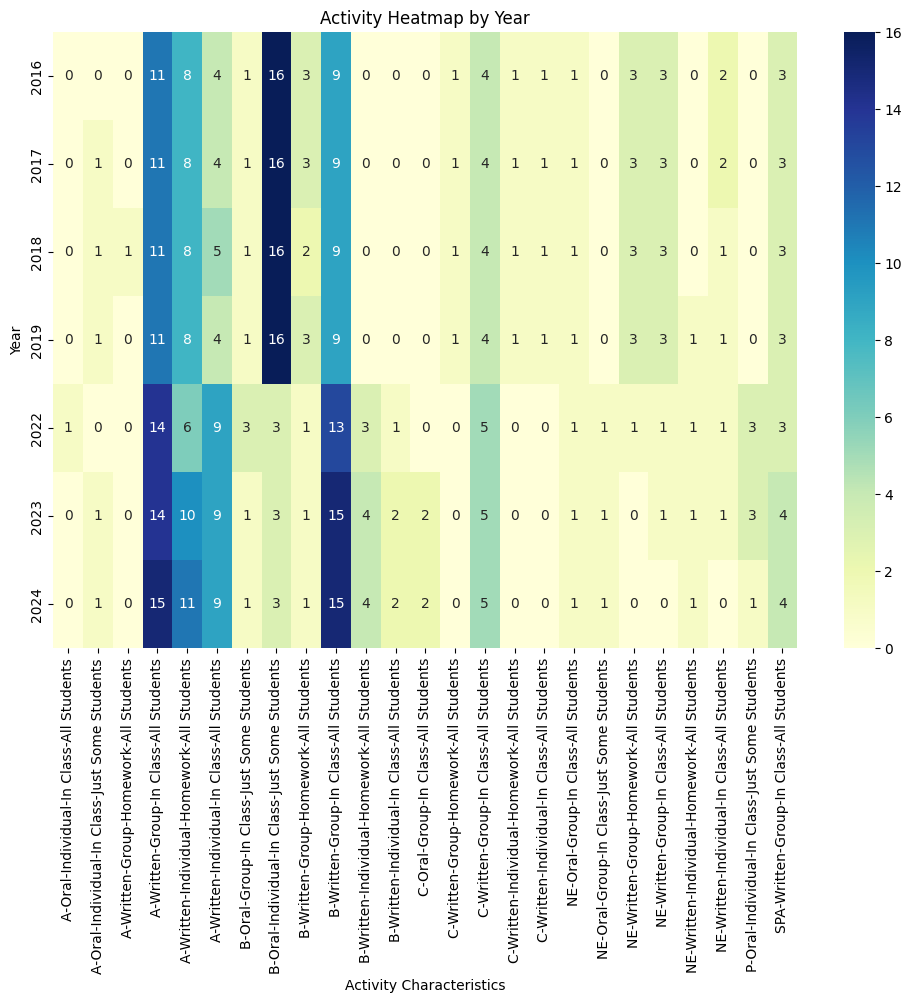

Activity Characteristics:
Type of Evaluation - Options: A / B / C / NE = Not Evaluated / SPA = Self and Peer Assessment / P = Participation
Oral/Written
Individual/Group
In Class/Homework
All Students/Just for some students


In [ ]:
# Assuming 'activities_pivot' is your pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(activities_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Activity Heatmap by Year')
plt.ylabel('Year')
plt.xlabel('Activity Characteristics')
plt.show()

print("Activity Characteristics:")
print("Type of Evaluation - Options: A / B / C / NE = Not Evaluated / SPA = Self and Peer Assessment / P = Participation")
print("Oral/Written")
print("Individual/Group")
print("In Class/Homework")
print("All Students/Just for some students")

## Load and Process Data

### Change column names, drop irrelevant columns, set category types

###### load_and_process_data(year, params)

In [ ]:
def load_and_process_data(year, params):
    """Load and process the dataset according to specified parameters."""
    filename = params['filename']
    skiprows = params['skiprows']
    cols2skip = params['cols2skip']
    last_col_range = params['last_col_range']

    # Define columns to use based on columns to skip
    cols = [i for i in range(last_col_range) if i not in cols2skip]

    # Load dataset
    dataset = pd.read_excel(filename, sheet_name=0, usecols=cols, skiprows=skiprows)
    print("DATASET for {}".format(year))
    print(dataset.dtypes)
    # Ensure all column data are strings before replacing
    dataset = dataset.applymap(lambda x: str(x) if not pd.isnull(x) else x)

    # Rename columns to a standardized format
    dataset.columns = dataset.columns.str.replace('Numero', 'ID').str.replace('Turma', 'Class').str.replace('Sigla_curso', 'Course').str.replace('Sexo', 'Sex').str.replace(params['commuting'], 'Commuting').str.replace('EE', 'SS').str.replace('AHA', 'SPA').str.replace('Bump', 'BonCoord').str.replace('Prt','PP').str.replace('PPTP','PTP').str.replace(params['freq_col'], 'freq').str.replace(params['grade_col'], 'FinalGrade').str.replace(params['grade_integer_col'], 'FinalGradeInteger')

    # Set ID as index
    dataset = dataset.set_index("ID")

    if (year == '2016'):
      dataset = dataset.drop(["3_2 TPC","3_4 TPC"], axis='columns') # Drop irrelevant columns (only exist in 2016 dataset)

    # Handle non-numeric entries before conversion
    dataset['FinalGrade'] = dataset['FinalGrade'].replace([params['failed_grade_value'], '*'], np.nan)

    # Replace commas with periods and convert to float
    dataset['FinalGrade'] = dataset['FinalGrade'].str.replace(',', '.').astype(float, errors='raise')

    #print("For year {}".format(year))
    # Change data types for easier analysis
    if 'Class' in dataset.columns:
        dataset['Class'] = dataset['Class'].astype('category')
    if 'Course' in dataset.columns:
        dataset['Course'] = dataset['Course'].astype('category')
        if 'EG' in dataset['Course'].cat.categories:
            dataset['Course'] = dataset['Course'].cat.remove_categories(['EG'])
            dataset["Course"] = dataset["Course"].fillna('LEG')
    if 'Sex' in dataset.columns:
        dataset['Sex'] = dataset['Sex'].astype('category')

    if 'Commuting' in dataset.columns:
        dataset['Commuting'] = dataset['Commuting'].astype('category')
        dataset['Commuting'] = dataset['Commuting'].cat.add_categories(['NA'])
        dataset['Commuting'] = dataset['Commuting'].fillna('NA')
        if year == '2017':
            dataset['Commuting'] = dataset['Commuting'].cat.add_categories(['1', '2', '3', '4', '5'])
            dataset['Commuting'] = dataset['Commuting'].cat.remove_categories(['DESLOCADO - PERTO'])
            dataset['Commuting'] = dataset['Commuting'].fillna('1')
            dataset['Commuting'] = dataset['Commuting'].cat.remove_categories(['DESLOCADO'])
            dataset['Commuting'] = dataset['Commuting'].fillna('2')
            dataset['Commuting'] = dataset['Commuting'].cat.remove_categories(['DESLOCADO - ILHAS'])
            dataset['Commuting'] = dataset['Commuting'].fillna('3')
            dataset['Commuting'] = dataset['Commuting'].cat.remove_categories(['???? INSCRITO À POSTERIORI'])
            dataset['Commuting'] = dataset['Commuting'].fillna('NA')
        if year == '2018':
          dataset['Commuting'] = dataset['Commuting'].cat.add_categories(['5'])
        if year == '2019':
          dataset['Commuting'] = dataset['Commuting'].cat.add_categories(['5'])
        if year == '2024':
          dataset = dataset.drop('Commuting', axis=1)
    if 'SS' in dataset.columns:
        dataset['SS'] = dataset['SS'].astype('category')
    if 'freq' in dataset.columns:
        dataset['freq'] = dataset['freq'].astype('category')

    # Check if 'FinalGradeInteger' is in columns before converting
    if 'FinalGradeInteger' in dataset.columns:
        # Replace non-numeric values in 'FinalGradeInteger' and convert
        dataset['FinalGradeInteger'] = pd.to_numeric(dataset['FinalGradeInteger'], errors='coerce')

        # Filter datasets for passed and failed students based on the failed grade value
        dataset_passed = dataset[dataset['FinalGradeInteger'].notna()].copy()
        dataset_failed = dataset[dataset['FinalGradeInteger'].isna()].copy()

        # Convert data types after filtering
        dataset_passed['FinalGradeInteger'] = dataset_passed['FinalGradeInteger'].astype('int64')
    else:
        print(f"'FinalGradeInteger' column is missing in the dataset for {year}.")
        dataset_passed = dataset.copy()
        dataset_failed = pd.DataFrame()

    return dataset_passed, dataset_failed




In [ ]:
# Load and process all datasets
datasets = {}
for year in dataset_params:
    params = dataset_params[year]
    dataset_passed, dataset_failed = load_and_process_data(year, params)
    datasets[year] = {
        'passed': dataset_passed,
        'failed': dataset_failed
    }

datasets_passed_failed = datasets

DATASET for 2016
Numero                int64
Turma                 int64
Sigla_curso          object
Sexo                  int64
EE                   object
                      ...  
PTP4                  int64
PTP5                  int64
freq2016             object
NotaFinalDecPauta    object
NotaFinalClip        object
Length: 134, dtype: object
DATASET for 2017
Numero             int64
Turma              int64
Sexo               int64
EDESLOCADO        object
EE                object
                  ...   
PTP4             float64
PTP5             float64
Freq201617        object
Val_Tot_Pauta    float64
NotaFinal         object
Length: 134, dtype: object
DATASET for 2018
Numero            int64
Turma             int64
Sigla_curso      object
Sexo              int64
DESLOCADO         int64
                  ...  
PTP4              int64
PTP5              int64
Freq201718       object
Val_Tot_Pauta    object
NotaFinal        object
Length: 140, dtype: object
DATASET for 2019
Nume

In [ ]:
def combine_and_process_datasets(datasets):
    combined_datasets = {}
    for year, data_types in datasets.items():
        # Combine passed and failed datasets
        combined_dataset = pd.concat([data_types['passed'], data_types['failed']])

        # Store the combined dataset
        combined_datasets[year] = combined_dataset

    return combined_datasets


In [ ]:
def clean_datasets(datasets):
    """
    Clean datasets by removing completely empty columns and rows.
    Args:
        datasets (dict): Dictionary of pandas DataFrames keyed by year or other identifiers.
    Returns:
        dict: Cleaned datasets with empty columns and rows removed.
    """
    cleaned_datasets = {}
    for year, dataset in datasets.items():
        # Drop columns where all elements are NaN
        dataset_cleaned = dataset.dropna(axis=1, how='all')
        # Drop rows where all elements are NaN
        dataset_cleaned = dataset_cleaned.dropna(axis=0, how='all')
        cleaned_datasets[year] = dataset_cleaned
    return cleaned_datasets




In [ ]:
def save_datasets(datasets, prefix):
    """
    Save datasets to CSV files.
    Args:
        datasets (dict): Dictionary of pandas DataFrames keyed by year or other identifiers.
        prefix (str): Prefix for the output file names.
    """
    for year, dataset in datasets.items():
        dataset.to_csv(f'{prefix}_{year}.csv')


In [ ]:
# Assume 'combined_datasets' is already defined with 'passed' and 'failed' data for each year

combined_datasets = combine_and_process_datasets(datasets)

cleaned_datasets = clean_datasets(combined_datasets)


# Save the cleaned datasets
#save_datasets(cleaned_datasets, 'Processed_Dataset')

# Further analysis and visualization can proceed from here.

In [ ]:
for year in dataset_params:
  print(combined_datasets[year].dtypes)

Class                category
Course               category
Sex                  category
SS                   category
1_0                    object
                       ...   
PTP4                   object
PTP5                   object
freq                 category
FinalGrade            float64
FinalGradeInteger     float64
Length: 131, dtype: object
Class                category
Sex                  category
Commuting            category
SS                   category
Course               category
                       ...   
PTP4                   object
PTP5                   object
freq                 category
FinalGrade            float64
FinalGradeInteger     float64
Length: 133, dtype: object
Class                category
Course               category
Sex                  category
Commuting            category
SS                   category
                       ...   
PTP4                   object
PTP5                   object
freq                 category
FinalGrade      

In [ ]:
for year in dataset_params:
  print(combined_datasets[year].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, 20160001 to 20161147
Columns: 131 entries, Class to FinalGradeInteger
dtypes: category(5), float64(42), object(84)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 20170002 to 20171145
Columns: 133 entries, Class to FinalGradeInteger
dtypes: category(6), float64(12), object(115)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 2018001 to 2019101
Columns: 139 entries, Class to FinalGradeInteger
dtypes: category(6), float64(41), object(92)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 2019001 to 2019999
Columns: 140 entries, Class to FinalGradeInteger
dtypes: category(5), float64(27), object(108)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 2022001 to 2023154
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------

In [ ]:
for year in dataset_params:
  print(cleaned_datasets[year].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, 20160001 to 20161147
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Class              1169 non-null   category
 1   Course             1169 non-null   category
 2   Sex                1169 non-null   category
 3   SS                 60 non-null     category
 4   1_0                1053 non-null   object  
 5   1_1                1169 non-null   object  
 6   1_10               991 non-null    object  
 7   1_11               1049 non-null   object  
 8   1_12a              1169 non-null   object  
 9   1_12b              1169 non-null   object  
 10  1_2                1169 non-null   object  
 11  1_3b               1065 non-null   object  
 12  1_4a               1166 non-null   object  
 13  1_4b               1169 non-null   object  
 14  1_5                1 non-null      object  
 15  1_6                1169 non-null   object  
 16  

In [ ]:
#for year, dataset in cleaned_datasets.items():
 # print(dataset.index)


## Generate Lists...

#### Basic Lists
The `generate_basic_lists` function generates lists to separate types of features from the dataset, including only existing columns. These lists include categorical columns, grade-related columns, asynchronous columns, and more. The function ensures that only columns present in the dataset are included in the lists.

* **generate_basic_lists(dataset)**
  - **Parameters:**
    - `dataset (DataFrame)`: The dataset containing columns for different features.
  - **Returns:**
    - `dict`: A dictionary containing the generated lists.
  - **Generated Lists:**
    - `listAllColumns`: All columns in the dataset.
    - `listCategorical`: Categorical columns (e.g., 'Course', 'Class', 'Sex', etc.).
    - `listGrades`: Grade-related columns (e.g., 'FinalGrade', 'FinalGradeInteger').
    - `listAsyncColumns`: Asynchronous columns (columns containing "_TE").
    - `listBonColumns`: Columns starting with "B".
    - `listSPAColumns`: Columns containing "SPA".
    - `listPPointsColumns`: Columns starting with "P".
    - `listSyncColumns`: Synchronous columns (not included in the other lists).
    - `listAllColumns_AsyncClasses`: Combination of categorical, asynchronous, SPA, Bon, PPoints, and grade columns.
    - `listAsyncNumericColumns`: Combination of asynchronous, SPA, Bon, PPoints, and grade columns.
    - `listSyncNumericColumns`: Combination of synchronous, SPA, Bon, PPoints, and grade columns.
    - `listAllColumns_SyncClasses`: Combination of categorical, synchronous, SPA, Bon, PPoints, and grade columns.

#### Weekly and Participation Lists
The `generate_weekly_and_participation_lists` function generates lists to separate features by week and participation points from the dataset. It creates lists for each week based on column prefixes and distinguishes between synchronous and asynchronous columns.

* **generate_weekly_and_participation_lists(dataset, listAsyncColumns)**
  - **Parameters:**
    - `dataset (DataFrame)`: The dataset containing columns for different features.
    - `listAsyncColumns (list)`: List of asynchronous columns from the basic lists.
  - **Returns:**
    - `dict`: A dictionary containing the weekly and participation point lists.
  - **Generated Lists:**
    - `listWeek1`: Columns starting with "1_".
    - `listWeek2`: Columns starting with "2_".
    - `listWeek3`: Columns starting with "3_".
    - `listWeek4`: Columns starting with "4_".
    - `listWeek5`: Columns starting with "5_".
    - `listWeekSync`: Synchronous columns for each week.
    - `listPPWeek1`: Participation point columns starting with "PP1_".
    - `listPPWeek2`: Participation point columns starting with "PP2_".
    - `listPPWeek3`: Participation point columns starting with "PP3_".
    - `listPPWeek4`: Participation point columns starting with "PP4_".
    - `listPP_TPs`: Participation point columns starting with "PTP".

#### Activity Type Lists
The `generate_activity_type_lists` function generates lists to categorize activities based on their types, JFS status, grouping, mode, and assignment type. It processes a dictionary of activities and categorizes them accordingly.

* **generate_activity_type_lists(activities)**
  - **Parameters:**
    - `activities (dict)`: A dictionary containing activity details.
  - **Returns:**
    - `dict`: A dictionary containing lists of activities categorized by type.
  - **Generated Lists:**
    - `EvTypeA`, `EvTypeB`, `EvTypeC`, `EvTypeSPA`, `EvNE`: Activity types.
    - `WrittenA`, `OralA`: Modes of activities.
    - `JFSA`, `WithoutJFS`: JFS status of activities.
    - `GroupA`, `IndivA`: Grouping of activities.
    - `ClassA`, `HomeworkA`: Assignment types.

#### Combined Datasets Processing
The `process_combined_datasets` function processes the combined datasets, generating and printing all relevant lists dynamically for each year.

* **process_combined_datasets(cleaned_datasets, dataset_params)**
  - **Parameters:**
    - `cleaned_datasets (dict)`: A dictionary of cleaned datasets for each year.
    - `dataset_params (dict)`: A dictionary of parameters for each dataset, including an activity dictionary.
  - **Returns:**
    - `dict`: A dictionary containing all lists for each year.
  - **Generated Lists:**
    - Basic lists generated by `generate_basic_lists`.
    - Weekly and participation lists generated by `generate_weekly_and_participation_lists`.
    - Activity type lists generated by `generate_activity_type_lists`.
    - Created columns (e.g., 'TotalColumns', 'WeeklyAP', 'WeeklyPP', 'OtherColumns').

#### Example Usage
```python
all_lists = process_combined_datasets(cleaned_datasets, dataset_params)



### ... Dependent on Loaded Datasets

###### generate_basic_lists(dataset)

In [ ]:
def generate_basic_lists(dataset):
    """
    Generate lists to separate types of features from the dataset, including only existing columns.

    Parameters:
    - dataset (DataFrame): The dataset containing columns for different features.

    Returns:
    - dict: A dictionary containing the generated lists.
    """
    # Define potential column names
    listCategorical = ['Course', 'Class', 'Sex', 'SS', 'Commuting', 'freq']
    listGrades = ['FinalGrade', 'FinalGradeInteger']
    listAllColumns = []
    listBonColumns = []
    listSPAColumns = []
    listPPointsColumns = []
    listSyncColumns = []
    listAsyncColumns = []

    # Filter lists based on column existence
    listCategorical = [col for col in listCategorical if col in dataset.columns]

    for col in dataset.columns:
        listAllColumns.append(col)
        if "_TE" in col:
            listAsyncColumns.append(col)
        elif col.startswith("B"):
            listBonColumns.append(col)
        elif "SPA" in col:
            listSPAColumns.append(col)
        elif col.startswith("P"):
            if col != 'Passed':
              listPPointsColumns.append(col)
        else:
            if col not in listCategorical + listGrades + listBonColumns +  listSPAColumns + listPPointsColumns + listAsyncColumns:
                listSyncColumns.append(col)

    lists = {
        'listAllColumns': listAllColumns,
        'listCategorical': listCategorical,
        'listGrades': listGrades,
        'listAsyncColumns': listAsyncColumns,
        'listBonColumns': listBonColumns,
        'listSPAColumns': listSPAColumns,
        'listPPointsColumns': listPPointsColumns,
        'listSyncColumns': listSyncColumns,
        'listAllColumns_AsyncClasses': listCategorical + listAsyncColumns + listSPAColumns + listBonColumns + listPPointsColumns + listGrades,
        'listAsyncNumericColumns':  listAsyncColumns + listSPAColumns + listBonColumns + listPPointsColumns + listGrades,
        'listSyncNumericColumns': listSyncColumns + listSPAColumns + listBonColumns + listPPointsColumns + listGrades,
        'listAllColumns_SyncClasses': listCategorical + listSyncColumns + listSPAColumns + listBonColumns + listPPointsColumns + listGrades
    }

    return lists

###### generate_weekly_and_participation_lists(dataset, listAsyncColumns)

In [ ]:
def generate_weekly_and_participation_lists(dataset, listAsyncColumns):
    """
    Generate lists to separate features by week and participation points from the dataset.

    Parameters:
    - dataset (DataFrame): The dataset containing columns for different features.
    - listAsyncColumns (list): List of asynchronous columns from the basic lists.

    Returns:
    - dict: A dictionary containing the weekly and participation point lists.
    """
    listWeek1 = []
    listWeek2 = []
    listWeek3 = []
    listWeek4 = []
    listWeek5 = []

    # Check if columns exist before adding to lists
    for col in dataset.columns:
        if col.startswith("1_"):
            listWeek1.append(col)
        elif col.startswith("2_"):
            listWeek2.append(col)
        elif col.startswith("3_"):
            listWeek3.append(col)
        elif col.startswith("4_"):
            listWeek4.append(col)
        elif col.startswith("5_"):
            listWeek5.append(col)

    listWeekSync = {
        1: [col for col in listWeek1 if col not in listAsyncColumns],
        2: [col for col in listWeek2 if col not in listAsyncColumns],
        3: [col for col in listWeek3 if col not in listAsyncColumns],
        4: [col for col in listWeek4 if col not in listAsyncColumns],
        5: [col for col in listWeek5 if col not in listAsyncColumns]
    }

    # Participation points
    listPPWeek1 = [col for col in dataset.columns if col.startswith("PP1_")]
    listPPWeek2 = [col for col in dataset.columns if col.startswith("PP2_")]
    listPPWeek3 = [col for col in dataset.columns if col.startswith("PP3_")]
    listPPWeek4 = [col for col in dataset.columns if col.startswith("PP4_")]
    listPPWeek5 = [col for col in dataset.columns if col.startswith("PP5_")]
    listPP_TPs = [col for col in dataset.columns if col.startswith("PTP")]

    weekly_lists = {
        'listWeek1': listWeek1,
        'listWeek2': listWeek2,
        'listWeek3': listWeek3,
        'listWeek4': listWeek4,
        'listWeek5': listWeek5,
        'listWeekSync': listWeekSync,
        'listPPWeek1': listPPWeek1,
        'listPPWeek2': listPPWeek2,
        'listPPWeek3': listPPWeek3,
        'listPPWeek4': listPPWeek4,
        'listPPWeek5': listPPWeek5,
        'listPP_TPs': listPP_TPs
    }

    return weekly_lists


### ... Dependent of Activity Characterization

###### generate_activity_type_lists(activities)

In [ ]:
def generate_activity_type_lists(activities):
    lists_by_type = {
        'EvTypeA': [], 'EvTypeB': [], 'EvTypeC': [], 'EvTypeSPA': [], 'EvNE': [],
        'WrittenA': [], 'OralA': [], 'JFSA': [], 'WithoutJFS': [],
        'GroupA': [], 'IndivA': [], 'ClassA': [], 'HomeworkA': []
    }

    for key, value in activities.items():
        if value[2] == 'A':
            lists_by_type['EvTypeA'].append(key)
        elif value[2] == 'B':
            lists_by_type['EvTypeB'].append(key)
        elif value[2] == 'C':
            lists_by_type['EvTypeC'].append(key)
        elif value[2] == 'SPA':
            lists_by_type['EvTypeSPA'].append(key)
        else:
            lists_by_type['EvNE'].append(key)

        if value[3] == 1:
            lists_by_type['JFSA'].append(key)
        else:
            lists_by_type['WithoutJFS'].append(key)

        if value[4] == 1:
            lists_by_type['IndivA'].append(key)
        else:
            lists_by_type['GroupA'].append(key)

        if value[5] == 1:
            lists_by_type['WrittenA'].append(key)
        else:
            lists_by_type['OralA'].append(key)

        if value[6] == 1:
            lists_by_type['HomeworkA'].append(key)
        else:
            lists_by_type['ClassA'].append(key)

    return lists_by_type



In [ ]:
def process_combined_datasets(cleaned_datasets, dataset_params):
    all_lists = {}

    for year, dataset in cleaned_datasets.items():
        basic_lists = generate_basic_lists(dataset)
        weekly_and_participation_lists = generate_weekly_and_participation_lists(dataset, basic_lists['listAsyncColumns'])
        activity_type_lists = generate_activity_type_lists(dataset_params[year].get('activity_dictionary'))

        created_columns = {
            'TotalColumns': ['Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
            'WeeklyAP': ['Week1_AP', 'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP'],
            'WeeklyPP': ['Week1_PP', 'Week2_PP', 'Week3_PP', 'Week4_PP', 'Week5_PP'],
            'OtherColumns': ['Passed']
        }

        all_lists[year] = {
            'basic_lists': basic_lists,
            'weekly_and_participation_lists': weekly_and_participation_lists,
            'activity_type_lists': activity_type_lists,
            'created_columns': created_columns
        }

        # Print all lists for both basic, weekly, activity types and created columns dynamically
        print(f"\nYear: {year}")
        for list_name, list_values in basic_lists.items():
            print(f"Basic List - {list_name}: {list_values}")
        for list_name, list_values in weekly_and_participation_lists.items():
            print(f"Weekly/Participation List - {list_name}: {list_values}")
        for list_name, list_values in activity_type_lists.items():
            print(f"Activity Type List - {list_name}: {list_values}")
        for list_name, list_values in created_columns.items():
            print(f"Created Columns - {list_name}: {list_values}")

    return all_lists

In [ ]:
all_lists = process_combined_datasets(cleaned_datasets, dataset_params)


Year: 2016
Basic List - listAllColumns: ['Class', 'Course', 'Sex', 'SS', '1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a', '1_4b', '1_5', '1_6', '1_8', '2_1', '2_11', '2_12b', '2_12c', '2_13', '2_15b', '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6', '2_7', '2_8a', '2_8b', '2_8c', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_3', '4_4a', '4_4b', '4_5', '4_7', '4_8b', '4_9', '5_1', '5_10a', '5_10b', '5_11', '5_2', '5_3', '5_6', '5_7', '5_8', '5_9', 'SPA1', 'SPA2', 'SPA3', 'Bon', 'BonCoord', 'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2', 'PP3_3', 'PP4_1', 'PP4_2', 'PP5_1', 'PP5_2', 'PP5_3', 'PTP1', 'PTP2', 'PTP3', 'PTP4', 'PTP5', 'freq', 'FinalGrade', 'FinalGradeInteger']
Basic List - listCategorical: ['Course', 'Class', 'Sex', 'SS', 'freq']
Basic List - listGrades: ['FinalGrade', 'FinalGradeInteger']
Basic List - listAsyncColumns: []
Basic List - listBonColumns: ['Bon', 'BonCoord']
B

In [ ]:
#print(all_lists.keys())
#print(all_lists['2019'].get('basic_lists').keys())
#print(all_lists['2019'].get('activity_type_lists').keys())
#print(all_lists['2019'].get('weekly_and_participation_lists').keys())

In [ ]:
#print(all_lists['2019'].get('basic_lists').get('listCategorical'))

In [ ]:
#print(all_lists['2019'].get('activity_type_lists').get('EvTypeA'))

In [ ]:
#print(all_lists['2019'].get('weekly_and_participation_lists').get('listWeekSync'))

In [ ]:
print(cleaned_datasets['2016'].head())

         Class Course Sex   SS  1_0 1_1 1_10 1_11 1_12a 1_12b  ... PP5_2  \
ID                                                             ...         
20160001    32  MIEMc   0  NaN  1.0   0  1.0  1.0     1     3  ...     1   
20160002    12   MIEC   1  NaN  1.0   0  1.0  1.0     1     0  ...     1   
20160003     1  MIEMc   1  NaN  1.0   0  1.0  1.0     1     0  ...     1   
20160004    12   MIEI   0  NaN  1.0   0  1.0  1.0     1     0  ...     1   
20160005    23  MIEEC   1  bas  1.0   0  1.0  1.0     0     0  ...     1   

         PP5_3 PTP1 PTP2 PTP3 PTP4 PTP5 freq FinalGrade FinalGradeInteger  
ID                                                                         
20160001     1    1    1    0    1    1    S       13.9              14.0  
20160002     1    1    1    0    1    1    S       14.9              15.0  
20160003     1    1    1    1    1    1    S       17.2              17.0  
20160004     1    1    0    2    0    1    S       16.6              17.0  
20160005   

## Processing Phase 2


1.   Correct Numeric Attributes Type (all to 'float64')
2.   Drop students that did all classes on synchonous mode
3.   Create attributes with the total sum of each type of point
  *   AP = Activity Points
  *   PP = Participation Points
  *   SPA = Self and Peer Assessment (Points)
  *   Bon = Bonification Points





In [ ]:
datasets = cleaned_datasets

In [ ]:
for year, dataset in datasets.items():
    print(" {} dataset: {} students".format(year,len(dataset)))

 2016 dataset: 1169 students
 2017 dataset: 1152 students
 2018 dataset: 1105 students
 2019 dataset: 1055 students
 2022 dataset: 1179 students
 2023 dataset: 1109 students
 2024 dataset: 1121 students


### Presentation of the Number of students on Asynchonous and Synchonous Classes

In [ ]:
for year, dataset in datasets.items():
  print(year)
  datasetAsyncClassesOnly = dataset.dropna(subset=all_lists[year].get('basic_lists').get('listAsyncColumns'), how='all').copy()
  datasetSyncClassesOnly = dataset.dropna(subset=all_lists[year].get('basic_lists').get('listSyncColumns'),how='all').copy()
  datasetSyncClassesOnly2 = dataset.drop(datasetAsyncClassesOnly.index).copy()
  print("Number of Students on Async Classes = {}".format(len(datasetAsyncClassesOnly)))
  print("Number of Students on Sync Classes = {}".format(len(datasetSyncClassesOnly)))
  print("Number of Students only on Sync Classes = {}".format(len(datasetSyncClassesOnly2)))

2016
Number of Students on Async Classes = 0
Number of Students on Sync Classes = 1169
Number of Students only on Sync Classes = 1169
2017
Number of Students on Async Classes = 2
Number of Students on Sync Classes = 1152
Number of Students only on Sync Classes = 1150
2018
Number of Students on Async Classes = 1
Number of Students on Sync Classes = 1105
Number of Students only on Sync Classes = 1104
2019
Number of Students on Async Classes = 4
Number of Students on Sync Classes = 1055
Number of Students only on Sync Classes = 1051
2022
Number of Students on Async Classes = 0
Number of Students on Sync Classes = 1179
Number of Students only on Sync Classes = 1179
2023
Number of Students on Async Classes = 0
Number of Students on Sync Classes = 1109
Number of Students only on Sync Classes = 1109
2024
Number of Students on Async Classes = 0
Number of Students on Sync Classes = 1121
Number of Students only on Sync Classes = 1121


### Setting numeric types and creation of new columns

In [ ]:
datasetNumeric = datasets.copy()

for year, dataset in datasets.items():
    print(year)

    # Extract the relevant lists from all_lists
    listSyncColumns = all_lists[year].get('basic_lists').get('listSyncColumns')
    listPPointsColumns = all_lists[year].get('basic_lists').get('listPPointsColumns')
    listSPAColumns = all_lists[year].get('basic_lists').get('listSPAColumns')
    listBonColumns = all_lists[year].get('basic_lists').get('listBonColumns')
    integerColumns = all_lists[year].get('basic_lists').get('listSyncNumericColumns').copy()

    # Check if 'FinalGradeInteger' is in the dataset columns before processing
    if 'FinalGradeInteger' not in integerColumns:
        print(f"'FinalGradeInteger' is missing in the dataset for {year}.")
        continue

    integerColumns.remove('FinalGrade')

    # Ensure all integer columns are present in the dataset before applying pd.to_numeric
    missing_columns = [col for col in integerColumns if col not in dataset.columns]
    if missing_columns:
        print(f"Columns {missing_columns} are missing in the dataset for {year}.")
        continue

    datasetNumeric[year] = dataset[integerColumns].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

    # Join the 'FinalGrade' column back to the dataset
    if 'FinalGrade' in dataset.columns:
        datasetNumeric[year] = datasetNumeric[year].join(dataset['FinalGrade'])
    else:
        print(f"'FinalGrade' is missing in the dataset for {year}.")
        continue

    datasetAsyncClassesOnly = datasets[year].dropna(subset=all_lists[year].get('basic_lists').get('listAsyncColumns'), how='all').copy()
    display(datasetNumeric[year].describe())
    print("Number of Students only on Sync Classes = {}".format(len(datasetNumeric[year])))

    # Calculate 'Total_AP'
    if all_lists[year].get('basic_lists').get('listSyncColumns'):
        datasetNumeric[year]['Total_AP'] = datasetNumeric[year][all_lists[year].get('basic_lists').get('listSyncColumns')[0]]
        for i in range(1, len(all_lists[year].get('basic_lists').get('listSyncColumns'))):
            datasetNumeric[year]['Total_AP'] += datasetNumeric[year][all_lists[year].get('basic_lists').get('listSyncColumns')[i]]

    # Calculate 'Total_PP'
    if all_lists[year].get('basic_lists').get('listPPointsColumns'):
        datasetNumeric[year]['Total_PP'] = datasetNumeric[year][all_lists[year].get('basic_lists').get('listPPointsColumns')[0]]
        for i in range(1, len(all_lists[year].get('basic_lists').get('listPPointsColumns'))):
            datasetNumeric[year]['Total_PP'] += datasetNumeric[year][all_lists[year].get('basic_lists').get('listPPointsColumns')[i]]

    # Calculate 'Total_SPA'
    if all_lists[year].get('basic_lists').get('listSPAColumns'):
        datasetNumeric[year]['Total_SPA'] = datasetNumeric[year][all_lists[year].get('basic_lists').get('listSPAColumns')[0]]
        for i in range(1, len(all_lists[year].get('basic_lists').get('listSPAColumns'))):
            datasetNumeric[year]['Total_SPA'] += datasetNumeric[year][all_lists[year].get('basic_lists').get('listSPAColumns')[i]]

    # Calculate 'Total_Bon'
    if all_lists[year].get('basic_lists').get('listBonColumns'):
        datasetNumeric[year]['Total_Bon'] = datasetNumeric[year][all_lists[year].get('basic_lists').get('listBonColumns')[0]]
        for i in range(1, len(all_lists[year].get('basic_lists').get('listBonColumns'))):
            datasetNumeric[year]['Total_Bon'] += datasetNumeric[year][all_lists[year].get('basic_lists').get('listBonColumns')[i]]


2016


,1_0,1_1,1_10,1_11,1_12a,1_12b,1_2,1_3b,1_4a,1_4b,...,PP5_1,PP5_2,PP5_3,PTP1,PTP2,PTP3,PTP4,PTP5,FinalGradeInteger,FinalGrade
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,...,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1106.000000
mean,0.894782,0.033362,0.847733,0.897348,0.929855,0.415740,0.034217,0.910180,2.474765,0.623610,...,0.940975,1.002566,1.025663,0.927288,0.947819,0.868263,0.828914,0.893071,15.196749,15.975407
std,0.306966,0.297965,0.359433,0.303634,0.348981,0.986185,0.304969,0.286047,0.925988,1.122005,...,0.515950,0.476316,0.504458,0.339746,0.469823,0.521550,0.469792,0.568609,4.170258,2.125248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,14.900000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,16.500000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,17.500000
max,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,19.900000


Number of Students only on Sync Classes = 1169
2017


,1_0,1_1,1_10,1_11,1_12a,1_12b,1_2,1_3b,1_4a,1_4b,...,PP5_1,PP5_2,PP5_3,PTP1,PTP2,PTP3,PTP4,PTP5,FinalGradeInteger,FinalGrade
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,0.913194,0.052083,0.840278,0.901042,0.875868,0.555556,0.027778,0.897569,2.573785,0.662326,...,0.953993,0.962674,0.973090,0.931424,0.906250,0.876736,0.888021,0.781250,15.776910,15.748644
std,0.281672,0.222292,0.366507,0.298736,0.329875,1.144034,0.278246,0.303345,0.908368,1.189165,...,0.488407,0.494448,0.529057,0.322327,0.486012,0.510954,0.437744,0.585723,4.626602,4.492571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000,15.710000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,17.083500
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,18.077500
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,4.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,20.000000,20.000000


Number of Students only on Sync Classes = 1152
2018


,1_0,1_1,1_10,1_11,1_12a,1_12b,1_2,1_3b,1_4a,1_4b,...,PP5_1,PP5_2,PP5_3,PTP1,PTP2,PTP3,PTP4,PTP5,FinalGradeInteger,FinalGrade
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,...,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1076.000000
mean,0.960181,0.056109,0.905882,0.954751,0.902262,0.611765,0.022624,0.920362,2.697738,0.624434,...,0.984615,1.012670,0.986425,0.973756,0.961086,0.927602,0.863348,0.827149,16.639819,17.011896
std,0.195622,0.230236,0.292125,0.207944,0.297094,1.148584,0.252585,0.270855,0.703926,1.122538,...,0.447151,0.435955,0.451243,0.298303,0.429154,0.440487,0.466607,0.594346,3.120271,1.503839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000,16.300000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,17.400000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,19.900000


Number of Students only on Sync Classes = 1105
2019


,1_0,1_1,1_10,1_11,1_12a,1_12b,1_2,1_3b,1_4a,1_4b,...,PP5_1,PP5_2,PP5_3,PTP1,PTP2,PTP3,PTP4,PTP5,FinalGradeInteger,FinalGrade
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1013.000000
mean,0.938389,0.030332,0.891943,0.891943,0.908057,0.683412,0.028436,0.892891,2.690047,0.624645,...,0.944076,0.984834,0.985782,0.962085,0.958294,0.922275,0.908057,0.771564,16.028436,16.623198
std,0.240562,0.171580,0.310599,0.310599,0.289083,1.209646,0.280868,0.309398,0.760534,1.133147,...,0.468860,0.456616,0.463862,0.314850,0.415731,0.445967,0.435696,0.559502,3.572394,1.465245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.200000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000,15.800000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,16.900000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,17.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,19.800000


Number of Students only on Sync Classes = 1055
2022


,1_0,1_12,1_13a,1_13b,1_13c,1_14,1_16a,1_16b,1_17,1_18a,...,PP2_4,PP3_1,PP3_2,PP3_3,PP3_4,PTP1,PTP2,PTP3,FinalGradeInteger,FinalGrade
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,0.907549,0.902460,0.902460,1.337574,0.916879,0.915182,0.916031,1.251060,2.367260,0.897371,...,0.988974,0.966921,0.99067,0.983885,0.974555,0.807464,0.883800,0.840543,15.543681,15.586280
std,0.289785,0.296818,0.296818,1.449678,0.276183,0.278728,0.277460,1.424288,0.982865,0.303603,...,0.434951,0.429899,0.40466,0.402342,0.419431,0.514059,0.500493,0.509687,4.131795,3.837579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,15.538500
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,16.747000
75%,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,17.399000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,19.443000


Number of Students only on Sync Classes = 1179
2023


,1_0,1_11,1_12,1_13,1_14,1_4,1_5,1_6a,1_6b,1_7,...,PP4_3,PP4_4,PP4_5,PTP1,PTP2,PTP3,PTP4,PTP5,FinalGradeInteger,FinalGrade
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1060.000000
mean,0.864743,0.911632,0.914337,0.910730,0.913436,0.891794,0.888188,2.464382,1.248873,0.915239,...,1.002705,0.970243,1.019838,0.926060,0.908927,0.904418,0.859333,0.798016,15.373309,15.935094
std,0.342152,0.283957,0.279992,0.285261,0.281323,0.310780,0.315278,0.895155,1.368585,0.278651,...,0.415181,0.482564,0.470774,0.424792,0.487943,0.467218,0.527284,0.554564,3.626697,1.525105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,15.200000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,16.200000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,17.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,19.500000


Number of Students only on Sync Classes = 1109
2024


,1_0,1_1,1_10,1_12,1_13,1_14,1_2,1_4,1_5,1_6,...,PP4_2,PP4_3,PP4_4,PP4_5,PTP1,PTP2,PTP3,PTP4,FinalGradeInteger,FinalGrade
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1062.000000
mean,0.834969,0.850134,1.294380,0.914362,0.883140,0.91347,0.916146,0.916146,0.900981,0.862623,...,0.981267,0.953613,0.984835,0.964318,0.942016,0.971454,0.917930,0.865299,14.619982,15.212900
std,0.371374,0.357100,1.418266,0.279953,0.321397,0.28127,0.277292,0.277292,0.298820,0.344399,...,0.461564,0.475834,0.447954,0.484190,0.408865,0.458147,0.534898,0.502369,3.800624,1.608634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,14.200000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,15.500000
75%,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,16.500000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,18.600000


Number of Students only on Sync Classes = 1121


In [ ]:
#datasetNumeric['2016'].dtypes

###### create_weekly_and_total_datasets(year, dataset, all_lists)

In [ ]:
def create_weekly_and_total_datasets(year, dataset, all_lists):
    # Retrieve weekly columns
    weekly_and_participation_lists = all_lists[year]['weekly_and_participation_lists']
    listWeek1 = weekly_and_participation_lists.get('listWeek1', [])
    listWeek2 = weekly_and_participation_lists.get('listWeek2', [])
    listWeek3 = weekly_and_participation_lists.get('listWeek3', [])
    listWeek4 = weekly_and_participation_lists.get('listWeek4', [])
    listWeek5 = weekly_and_participation_lists.get('listWeek5', [])
    listPPWeek1 = weekly_and_participation_lists.get('listPPWeek1', [])
    listPPWeek2 = weekly_and_participation_lists.get('listPPWeek2', [])
    listPPWeek3 = weekly_and_participation_lists.get('listPPWeek3', [])
    listPPWeek4 = weekly_and_participation_lists.get('listPPWeek4', [])
    listPPWeek5 = weekly_and_participation_lists.get('listPPWeek5', [])

    # Function to safely sum columns
    def safe_sum_columns(df, columns):
        valid_columns = [col for col in columns if col in df.columns]
        if not valid_columns:
            return pd.Series([0] * len(df), index=df.index)
        total = df[valid_columns[0]].copy()
        for col in valid_columns[1:]:
            total += df[col]
        return total

    # Calculate weekly totals
    week_totals = {
        'Week1_AP': safe_sum_columns(dataset, listWeek1),
        'Week2_AP': safe_sum_columns(dataset, listWeek2),
        'Week3_AP': safe_sum_columns(dataset, listWeek3),
        'Week4_AP': safe_sum_columns(dataset, listWeek4),
        'Week5_AP': safe_sum_columns(dataset, listWeek5),
    }

    pp_totals = {
        'Week1_PP': safe_sum_columns(dataset, listPPWeek1),
        'Week2_PP': safe_sum_columns(dataset, listPPWeek2),
        'Week3_PP': safe_sum_columns(dataset, listPPWeek3),
        'Week4_PP': safe_sum_columns(dataset, listPPWeek4),
        'Week5_PP': safe_sum_columns(dataset, listPPWeek5),
    }

    # Create DataFrame with weekly totals
    dataframe_totals = pd.DataFrame({**week_totals, **pp_totals})

    # Merge with the original dataset
    dataset_with_totals = dataset.join(dataframe_totals, how='left')

    return dataset_with_totals

###### print_totals_description(dataset, all_lists)

In [ ]:
def print_totals_description(dataset, all_lists):
  for year, dataset in datasetNumeric.items():
    print("---------------------------------------------------------")
    print("")
    print(year)
    print("")
    print("Columns:")
    print(dataset.columns)
    print("")
    print('Activity Points')
    display(processed_dataset[year]['Total_AP'].describe())
    print("")
    print('Participation Points')
    display(processed_dataset[year]['Total_PP'].describe())
    print("")
    print('Self and Peer Assessment Points')
    display(processed_dataset[year]['Total_SPA'].describe())
    print("")
    print('Bonification Points')
    display(processed_dataset[year]['Total_Bon'].describe())
    print("")

##### processed_dataset creation

In [ ]:
# Processed dataset initialization
processed_dataset = {}

# Iterate over years and process datasets
for year, dataset in datasetNumeric.items():
    print("------------------------------------------------------------------")
    print("")
    print(year)
    print("")
    categorical_cols = all_lists[year]['basic_lists']['listCategorical']
    processed_dataset[year] = create_weekly_and_total_datasets(year, dataset, all_lists)
    processed_dataset[year] = datasets[year][categorical_cols].join(processed_dataset[year], how='right').copy()
    print("Number of students = {}".format(len(processed_dataset[year])))
   # display(processed_dataset[year].columns)
   # display(processed_dataset[year].describe())
    print("")

------------------------------------------------------------------

2016

Number of students = 1169

------------------------------------------------------------------

2017

Number of students = 1152

------------------------------------------------------------------

2018

Number of students = 1105

------------------------------------------------------------------

2019

Number of students = 1055

------------------------------------------------------------------

2022

Number of students = 1179

------------------------------------------------------------------

2023

Number of students = 1109

------------------------------------------------------------------

2024

Number of students = 1121



In [ ]:
print_totals_description(processed_dataset, all_lists)

---------------------------------------------------------

2016

Columns:
Index(['1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a',
       '1_4b', '1_5', '1_6', '1_8', '2_1', '2_11', '2_12b', '2_12c', '2_13',
       '2_15b', '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6',
       '2_7', '2_8a', '2_8b', '2_8c', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5',
       '3_6', '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_3', '4_4a', '4_4b',
       '4_5', '4_7', '4_8b', '4_9', '5_1', '5_10a', '5_10b', '5_11', '5_2',
       '5_3', '5_6', '5_7', '5_8', '5_9', 'SPA1', 'SPA2', 'SPA3', 'Bon',
       'BonCoord', 'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3',
       'PP3_1', 'PP3_2', 'PP3_3', 'PP4_1', 'PP4_2', 'PP5_1', 'PP5_2', 'PP5_3',
       'PTP1', 'PTP2', 'PTP3', 'PTP4', 'PTP5', 'FinalGradeInteger',
       'FinalGrade', 'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
      dtype='object')

Activity Points


count    1169.000000
mean       81.286570
std        20.377663
min         0.000000
25%        78.000000
50%        86.000000
75%        92.000000
max       107.000000
Name: Total_AP, dtype: float64


Participation Points


count    1169.000000
mean       18.309666
std         4.824834
min         0.000000
25%        17.000000
50%        19.000000
75%        21.000000
max        29.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1169.000000
mean       28.349016
std         6.785838
min         0.000000
25%        28.000000
50%        30.000000
75%        31.000000
max        39.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1169.000000
mean        0.031651
std         0.179966
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2017

Columns:
Index(['1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a',
       '1_4b', '1_6', '1_8', '2_1', '2_11', '2_12b', '2_12c', '2_13', '2_15b',
       '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6', '2_7',
       '2_8a', '2_8b', '2_8c', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6',
       '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_11', '4_2', '4_3', '4_4a',
       '4_4b', '4_5', '4_7', '4_8b', '4_9a', '4_9b', '5_1', '5_10', '5_11',
       '5_2', '5_3', '5_6', '5_7', '5_8', '5_9', 'SPA1', 'SPA2', 'SPA3', 'Bon',
       'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2',
       'PP3_3', 'PP4_1', 'PP4_2', 'PP4_3', 'PP5_1', 'PP5_2', 'PP5_3', 'PTP1',
       'PTP2', 'PTP3', 'PTP4', 'PTP5', 'FinalGradeInteger', 'FinalGrade',
       'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
      dtype='object')

Activity Points


count    1152.000000
mean       84.993924
std        24.324139
min         0.000000
25%        84.000000
50%        92.000000
75%        97.000000
max       111.000000
Name: Total_AP, dtype: float64


Participation Points


count    1152.000000
mean       18.958333
std         5.697714
min         0.000000
25%        18.000000
50%        20.000000
75%        22.000000
max        31.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1152.000000
mean       27.512153
std         8.172544
min         0.000000
25%        28.000000
50%        30.000000
75%        31.000000
max        40.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1152.000000
mean        0.026042
std         0.159328
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2018

Columns:
Index(['1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a',
       '1_4b', '1_6', '1_8', '1_9', '2_1', '2_11', '2_12b', '2_12c', '2_13',
       '2_15b', '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6',
       '2_7', '2_8a', '2_8b', '2_8c', '2_9a', '3_1', '3_2', '3_3', '3_4',
       '3_5', '3_6', '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_11', '4_2',
       '4_3', '4_4a', '4_4b', '4_5', '4_7', '4_8b', '4_9a', '4_9b', '5_1',
       '5_10', '5_11', '5_2', '5_3', '5_6', '5_7', '5_8', '5_9', 'SPA1',
       'SPA2', 'SPA3', 'Bon', 'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2',
       'PP2_3', 'PP3_1', 'PP3_2', 'PP3_3', 'PP4_1', 'PP4_2', 'PP5_1', 'PP5_2',
       'PP5_3', 'PTP1', 'PTP2', 'PTP3', 'PTP4', 'PTP5', 'FinalGradeInteger',
       'FinalGrade', 'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
      dtype='object')

Activity Points


count    1105.000000
mean       88.146606
std        16.236930
min         0.000000
25%        85.000000
50%        92.000000
75%        96.000000
max       109.000000
Name: Total_AP, dtype: float64


Participation Points


count    1105.000000
mean       18.715837
std         3.902430
min         0.000000
25%        18.000000
50%        19.000000
75%        21.000000
max        30.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1105.000000
mean       29.099548
std         5.381551
min         0.000000
25%        29.000000
50%        30.000000
75%        31.000000
max        39.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1105.000000
mean        0.019005
std         0.149276
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2019

Columns:
Index(['1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a',
       '1_4b', '1_6', '1_7', '1_8', '2_1', '2_11', '2_12b', '2_12c', '2_13',
       '2_15b', '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6',
       '2_7', '2_8a', '2_8b', '2_8c', '2_9a', '3_1', '3_2', '3_3', '3_4',
       '3_5', '3_6', '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_11', '4_2',
       '4_3', '4_4a', '4_4b', '4_5', '4_7', '4_8b', '4_9a', '4_9b', '5_1',
       '5_10', '5_11', '5_2', '5_3', '5_6', '5_7', '5_8', '5_9', 'SPA1',
       'SPA2', 'SPA3', 'Bon', 'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2',
       'PP2_3', 'PP3_1', 'PP3_2', 'PP3_3', 'PP4_1', 'PP4_2', 'PP4_3', 'PP5_1',
       'PP5_2', 'PP5_3', 'PTP1', 'PTP2', 'PTP3', 'PTP4', 'PTP5',
       'FinalGradeInteger', 'FinalGrade', 'Total_AP', 'Total_PP', 'Total_SPA',
       'Total_Bon'],
      dtype='object')

Activity Points


count    1055.000000
mean       86.341232
std        19.063839
min         0.000000
25%        84.000000
50%        91.000000
75%        96.000000
max       110.000000
Name: Total_AP, dtype: float64


Participation Points


count    1055.000000
mean       19.945024
std         4.832764
min         0.000000
25%        19.000000
50%        21.000000
75%        22.000000
max        32.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1055.000000
mean       28.682464
std         6.448646
min         0.000000
25%        29.000000
50%        30.000000
75%        31.000000
max        48.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1055.000000
mean        0.026540
std         0.166607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2022

Columns:
Index(['1_0', '1_12', '1_13a', '1_13b', '1_13c', '1_14', '1_16a', '1_16b',
       '1_17', '1_18a', '1_18b', '1_19', '1_20', '1_4', '1_5a', '1_5b', '1_6',
       '1_8', '2_0', '2_1', '2_11', '2_12', '2_13', '2_14', '2_15', '2_16',
       '2_17', '2_18a', '2_18b', '2_19', '2_2', '2_20', '2_21', '2_22a',
       '2_22b', '2_23', '2_3', '2_4', '2_5a', '2_5b', '2_6', '2_7', '2_8',
       '2_9a', '2_9b', '3_1', '3_10', '3_11', '3_12c', '3_12p', '3_13', '3_14',
       '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8', '3_9', 'SPA1', 'SPA2',
       'SPA3', 'Bon', 'PP1_1', 'PP1_2', 'PP1_3', 'PP1_4', 'PP2_1', 'PP2_2',
       'PP2_3', 'PP2_4', 'PP3_1', 'PP3_2', 'PP3_3', 'PP3_4', 'PTP1', 'PTP2',
       'PTP3', 'FinalGradeInteger', 'FinalGrade', 'Total_AP', 'Total_PP',
       'Total_SPA', 'Total_Bon'],
      dtype='object')

Activity Points


count    1179.000000
mean       93.653096
std        23.198800
min         0.000000
25%        94.000000
50%       100.000000
75%       105.000000
max       114.000000
Name: Total_AP, dtype: float64


Participation Points


count    1179.000000
mean       14.405428
std         3.998111
min         0.000000
25%        13.000000
50%        15.000000
75%        16.000000
max        25.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1179.000000
mean        6.286684
std         1.760995
min         0.000000
25%         6.000000
50%         7.000000
75%         7.000000
max        11.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1179.000000
mean        0.003393
std         0.058173
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2023

Columns:
Index(['1_0', '1_11', '1_12', '1_13', '1_14', '1_4', '1_5', '1_6a', '1_6b',
       '1_7', '1_9', '2_0a', '2_0b', '2_1', '2_11', '2_12', '2_13', '2_14a',
       '2_14b', '2_15', '2_16', '2_17', '2_18', '2_2', '2_3a', '2_3b', '2_4',
       '2_5', '2_6', '2_7', '2_8a', '2_8b', '2_9', '3_0a', '3_0b', '3_1',
       '3_10', '3_11', '3_12', '3_13a', '3_13b', '3_14', '3_15', '3_16', '3_2',
       '3_3', '3_4', '3_5', '3_6', '3_7', '3_8a', '3_8b', '3_9', '4_1', '4_10',
       '4_11', '4_12', '4_13', '4_14', '4_15', '4_2', '4_3', '4_4', '4_5',
       '4_6', '4_7', '4_8', '4_9', 'SPA1', 'SPA2', 'SPA3', 'SPA4', 'Bon',
       'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2',
       'PP3_3', 'PP3_4', 'PP4_1', 'PP4_2', 'PP4_3', 'PP4_4', 'PP4_5', 'PTP1',
       'PTP2', 'PTP3', 'PTP4', 'PTP5', 'FinalGradeInteger', 'FinalGrade',
       'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
      dtype='object')


count    1109.000000
mean      108.680794
std        24.175147
min         0.000000
25%       105.000000
50%       115.000000
75%       120.000000
max       136.000000
Name: Total_AP, dtype: float64


Participation Points


count    1109.000000
mean       19.190261
std         4.872458
min         0.000000
25%        18.000000
50%        20.000000
75%        22.000000
max        32.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1109.000000
mean        8.498647
std         2.012427
min         0.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        16.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1109.000000
mean        0.014427
std         0.119298
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Total_Bon, dtype: float64


---------------------------------------------------------

2024

Columns:
Index(['1_0', '1_1', '1_10', '1_12', '1_13', '1_14', '1_2', '1_4', '1_5',
       '1_6',
       ...
       'PTP1', 'PTP2', 'PTP3', 'PTP4', 'FinalGradeInteger', 'FinalGrade',
       'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
      dtype='object', length=102)

Activity Points


count    1121.000000
mean      105.643176
std        25.272502
min         0.000000
25%       102.000000
50%       113.000000
75%       119.000000
max       131.000000
Name: Total_AP, dtype: float64


Participation Points


count    1121.000000
mean       21.540589
std         5.525784
min         0.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        36.000000
Name: Total_PP, dtype: float64


Self and Peer Assessment Points


count    1121.000000
mean        8.471900
std         2.080815
min         0.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        13.000000
Name: Total_SPA, dtype: float64


Bonification Points


count    1121.000000
mean        0.066905
std         0.249968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Total_Bon, dtype: float64

In [ ]:
#print(processed_dataset['2016']['Week1_AP'])

In [ ]:
# Function to display dataset information with index alignment checks
def display_dataset_info(processed_dataset, datasets_passed_failed, year):
    print(f"***** {year} Passed-Failed ***********************************")

    # Ensure the indices exist in the processed dataset
    passed_indices = datasets_passed_failed[year]['passed'].index
    failed_indices = datasets_passed_failed[year]['failed'].index

    # Check if the indices are in the processed dataset
    common_passed_indices = passed_indices.intersection(processed_dataset[year].index)
    common_failed_indices = failed_indices.intersection(processed_dataset[year].index)

    # Display information for the passed and failed datasets
    if not common_passed_indices.empty:
        display(processed_dataset[year].loc[common_passed_indices])
    else:
        print(f"No common indices found for passed students in {year}")

    if not common_failed_indices.empty:
        display(processed_dataset[year].loc[common_failed_indices])
    else:
        print(f"No common indices found for failed students in {year}")

# Display datasets information for each year
print(" ******************** Datasets Information ******************** ")

years = ['2016', '2017', '2018', '2019', '2022', '2023', '2024']

for year in years:
    display_dataset_info(processed_dataset, datasets_passed_failed, year)


 ******************** Datasets Information ******************** 
***** 2016 Passed-Failed ***********************************


,Course,Class,Sex,SS,freq,1_0,1_1,1_10,1_11,1_12a,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
20160001,MIEMc,32,0,NaN,S,1,0,1,1,1,...,12,28,12,10,17,3,3,3,1,3
20160002,MIEC,12,1,NaN,S,1,0,1,1,1,...,9,22,19,16,15,2,3,3,2,3
20160003,MIEMc,1,1,NaN,S,1,0,1,1,1,...,11,26,23,10,17,4,3,3,1,4
20160004,MIEI,12,0,NaN,S,1,0,1,1,1,...,8,24,20,15,16,4,4,3,3,3
20160005,MIEEC,23,1,bas,S,1,0,1,1,0,...,7,24,19,7,11,2,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161165,MIEEC,11,1,NaN,S,1,0,1,1,0,...,7,31,15,20,16,2,3,4,2,3
20161166,MIEI,32,1,NaN,S,0,0,1,1,1,...,8,30,19,18,17,3,3,3,3,4
20161167,MIEA,33,1,NaN,S,1,0,1,1,1,...,8,19,19,19,12,3,2,3,2,3


,Course,Class,Sex,SS,freq,1_0,1_1,1_10,1_11,1_12a,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
20160019,MIEI,35,1,NaN,I,0,0,0,1,0,...,1,13,0,0,0,0,1,0,0,0
20160024,MIEI,16,1,NaN,A,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
20160027,MIEI,19,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160047,MIEI,17,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160083,MIEI,13,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161119,MIEI,10,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20161131,MIEI,25,0,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20161133,MIEI,35,1,te,I,1,0,0,1,1,...,7,9,14,0,0,3,1,1,0,0


***** 2017 Passed-Failed ***********************************


,Course,Class,Sex,SS,Commuting,freq,1_0,1_1,1_10,1_11,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
20170002,LBq,20,1,NaN,0,S,1,0,1,1,...,9,31,26,25,11,3,4,3,3,2
20170003,MIEI,3,1,NaN,2,S,1,0,1,1,...,9,25,22,8,14,2,3,2,2,3
20170004,LBCM,8,0,NaN,0,S,1,1,1,1,...,13,23,21,20,10,3,3,3,3,3
20170005,MIEEC,9,0,NaN,0,S,1,0,1,1,...,12,19,9,21,12,3,3,3,3,4
20170006,MIEB,31,0,NaN,2,S,1,0,1,1,...,12,28,25,23,13,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171148,LBq,12,0,NaN,1,S,1,0,1,1,...,7,28,26,29,9,3,3,4,4,3
20171149,LM,1,0,NaN,2,S,1,0,1,1,...,8,26,25,24,15,3,3,3,3,4
20171150,LQA,15,0,NaN,1,S,1,0,1,1,...,12,23,23,18,6,3,4,5,3,2


,Course,Class,Sex,SS,Commuting,freq,1_0,1_1,1_10,1_11,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
20170001,MIEI,8,0,NaN,1,A,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20170023,MIEA,32,1,NaN,0,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20170028,LEG,24,0,NaN,0,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20170053,MIEEC,18,1,NaN,2,I,1,0,1,1,...,7,16,11,15,5,2,2,2,2,0
20170057,MIEGI,21,1,te,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171074,MIEB,28,0,NaN,2,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20171084,MIEGI,11,1,NaN,0,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20171110,MIEMat,28,1,NaN,2,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***** 2018 Passed-Failed ***********************************


,Course,Class,Sex,SS,Commuting,freq,1_0,1_1,1_10,1_11,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2018001,LBCM,18,1,NaN,1,S,1,0,1,1,...,10,25,19,25,13,3,3,3,2,3
2018002,MIEB,22,1,NaN,2,S,1,0,0,1,...,7,32,22,18,8,3,3,3,1,2
2018003,MIEEC,30,1,NaN,3,S,1,0,1,1,...,13,16,22,20,9,3,2,3,2,2
2018005,LBq,8,0,NaN,2,S,1,0,1,1,...,13,26,26,23,13,3,4,3,3,5
2018006,MIEA,17,0,NaN,1,S,1,0,1,1,...,13,19,23,12,13,3,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019100,MIEI,17,1,NaN,1,S,1,0,1,1,...,13,30,23,25,10,4,4,3,3,4
2019102,MIEA,24,1,NaN,1,S,1,0,1,1,...,13,26,20,12,5,3,4,3,2,1
2019103,MIEC,6,1,NaN,2,S,1,0,1,1,...,10,28,22,14,12,3,3,3,1,2


,Course,Class,Sex,SS,Commuting,freq,1_0,1_1,1_10,1_11,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2018004,MIEC,11,1,NaN,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018075,MIEEC,9,1,NaN,2,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018077,MIEEC,14,1,NaN,2,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018130,LM,26,1,NaN,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018261,MIEB,27,1,NaN,3,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018370,MIEA,33,1,NaN,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018379,MIEI,1,1,NaN,3,I,1,0,0,1,...,7,9,1,0,0,2,1,0,0,0
2018408,MIEI,26,1,NaN,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018430,LEG,16,0,NaN,1,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***** 2019 Passed-Failed ***********************************


,Course,Class,Sex,SS,Commuting,1_0,1_1,1_10,1_11,1_12a,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2019001,MIEGI,11,0,NaN,1,1,0,1,1,1,...,12,24,23,16,11,3,3,3,2,3
2019002,LMAGR,32,0,NaN,4,1,0,1,1,1,...,12,30,21,21,9,4,4,3,4,1
2019004,LBCM,26,0,NaN,3,1,0,1,1,1,...,13,28,20,23,12,5,5,5,4,4
2019005,MIEC,32,1,NaN,2,0,0,1,1,1,...,11,17,18,20,12,3,2,3,4,2
2019006,MIEMc,17,1,NaN,0,1,0,1,1,1,...,10,21,20,24,11,3,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020051,MIEA,8,1,NaN,1,1,0,1,1,1,...,13,28,20,20,11,3,4,4,4,2
2020052,MIEQB,1,1,NaN,3,1,0,1,1,1,...,12,25,22,22,10,4,4,4,6,5
2020053,MIEC,25,1,NaN,2,1,0,1,1,1,...,12,30,21,20,10,4,3,3,3,3


,Course,Class,Sex,SS,Commuting,1_0,1_1,1_10,1_11,1_12a,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2019003,MIEMat,10,0,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019033,MIEMN,7,1,aactpa,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019104,LBCM,31,0,NaN,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019147,MIEMc,21,1,NaN,1,0,0,0,0,0,...,0,0,0,12,5,0,0,0,1,0
2019159,MIEMat,32,1,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019160,MIEEC,9,1,tpa,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019196,MIEEC,20,1,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019209,MIEA,15,0,NaN,3,0,0,0,1,0,...,6,4,0,0,0,1,0,0,0,0
2019211,MIEEC,32,1,NaN,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***** 2022 Passed-Failed ***********************************


,Course,Class,Sex,SS,Commuting,freq,1_0,1_12,1_13a,1_13b,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2022001,LEMN,20,1,NaN,NA,S,1,1,1,3,...,23,40,39,0,0,5,5,5,0,0
2022002,LEEC,17,1,NaN,NA,S,1,1,1,3,...,22,28,39,0,0,5,4,4,0,0
2022003,LEMN,9,0,NaN,NA,S,1,1,1,3,...,14,40,39,0,0,4,5,4,0,0
2022004,LEEC,13,1,NaN,NA,S,1,1,1,0,...,13,41,41,0,0,2,5,4,0,0
2022005,LEMc,4,1,NaN,NA,S,1,1,1,2,...,23,37,42,0,0,7,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023175,LBCM,4,1,NaN,NA,S,1,1,1,0,...,22,38,34,0,0,6,7,8,0,0
2023176,LEB,15,0,NaN,NA,S,1,1,1,3,...,23,39,43,0,0,4,4,4,0,0
2023177,LEC,22,1,NaN,NA,S,1,1,1,3,...,24,31,42,0,0,4,4,5,0,0


,Course,Class,Sex,SS,Commuting,freq,1_0,1_12,1_13a,1_13b,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2022007,LM,16,0,NaN,NA,I,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022053,LEI,12,1,NaN,NA,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022062,LEC,10,1,NaN,NA,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022089,LEGI,4,1,NaN,NA,I,1,1,1,0,...,22,27,3,0,0,4,3,0,0,0
2022106,LEGI,1,1,NaN,NA,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023138,LEGI,8,0,NaN,NA,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023141,LEEC,4,1,NaN,NA,I,0,1,1,0,...,13,0,0,0,0,4,0,0,0,0
2023146,LEI,14,1,NaN,NA,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***** 2023 Passed-Failed ***********************************


,Course,Class,Sex,SS,Commuting,freq,1_0,1_11,1_12,1_13,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2023001,LEMN,19,1,NaN,2,S,1,1,1,1,...,14,37,27,41,0,3,3,4,5,0
2023002,LEF,2,1,NaN,3,S,1,1,1,1,...,14,29,26,45,0,3,4,4,5,0
2023003,LEB,8,0,NaN,2,S,1,1,1,1,...,14,30,35,40,0,3,3,4,5,0
2023004,LBq,14,0,NaN,1,S,1,1,1,1,...,14,31,29,37,0,3,3,2,2,0
2023005,LEB,31,0,NaN,0,S,1,1,1,1,...,12,40,37,46,0,4,3,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024104,LEC,9,1,NaN,1,S,1,1,1,1,...,13,29,22,43,0,4,3,3,5,0
2024105,LBCM,5,1,NaN,0,S,1,1,1,1,...,14,32,27,39,0,3,4,4,6,0
2024106,LBCM,21,0,NaN,3,S,1,1,1,1,...,14,30,32,25,0,3,3,4,5,0


,Course,Class,Sex,SS,Commuting,freq,1_0,1_11,1_12,1_13,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2023018,LEQB,13,1,NaN,2,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2023024,LEC,21,0,NaN,5,I,1,1,1,1,...,9,23,11,1,0,2,2,2,0,0
2023037,LEGI,22,1,NaN,4,I,1,0,0,0,...,1,1,2,0,0,1,0,1,0,0
2023069,LEQB,4,0,NaN,1,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2023084,LEI,11,1,eserh,3,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2023086,LEA,16,1,tpa,1,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2023116,LM,27,1,NaN,2,I,1,0,0,0,...,2,12,0,0,0,0,1,0,0,0
2023173,LEC,31,1,NaN,0,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2023175,LEMN,27,0,NaN,2,A,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


***** 2024 Passed-Failed ***********************************


,Course,Class,Sex,SS,freq,1_0,1_1,1_10,1_12,1_13,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2024001,LEEC,8,1,NaN,S,1,1,3,1,1,...,16,30,31,30,0,4,4,6,4,0
2024002,LEEC,7,1,NaN,S,1,1,3,1,0,...,13,29,28,34,0,4,5,4,5,0
2024003,LEMt,12,0,NaN,S,1,1,0,1,1,...,16,34,30,39,0,4,4,5,6,0
2024004,LEEC,5,0,NaN,S,1,1,0,1,1,...,16,30,30,42,0,4,4,6,5,0
2024005,LEMt,24,1,NaN,S,0,0,2,1,0,...,9,21,32,36,0,3,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025117,LBq,9,0,NaN,S,1,1,0,1,1,...,16,33,33,41,0,4,4,5,6,0
2025118,LEI,7,1,NaN,S,1,1,3,1,1,...,14,31,27,42,0,4,4,5,6,0
2025119,LEMc,14,0,NaN,S,1,1,0,1,1,...,16,27,33,40,0,4,3,5,5,0


,Course,Class,Sex,SS,freq,1_0,1_1,1_10,1_12,1_13,...,Week1_AP,Week2_AP,Week3_AP,Week4_AP,Week5_AP,Week1_PP,Week2_PP,Week3_PP,Week4_PP,Week5_PP
ID,,,,,,,,,,,,,,,,,,,,,
2024064,LEI,9,0,eserhte,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024071,LEI,2,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024094,LEI,29,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024098,MIEMc,9,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024100,LEI,11,1,NaN,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024110,LEQB,29,1,NaN,I,1,1,0,0,0,...,3,4,5,0,0,1,0,0,0,0
2024113,LEI,17,1,eserh,A,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024114,LEI,29,1,NaN,I,1,1,0,0,0,...,3,1,0,0,0,1,0,0,0,0
2024131,LEEC,7,1,NaN,I,1,1,0,0,0,...,8,5,24,10,0,3,1,2,2,0


In [ ]:
def process_datasets_for_passed_and_failed(processed_dataset, datasets_passed_failed):
    """
    Processes datasets to create approved and repproved datasets,
    and combines them into a complete dataset with a 'Passed' column.

    Parameters:
    processed_dataset (dict): Dictionary containing the processed datasets for each year.
    datasets_passed_failed (dict): Dictionary containing the passed and failed indices for each year.

    Returns:
    dict: Dictionary containing the complete datasets with the 'Passed' column for each year.
    """
    dataset_approved = {}
    dataset_repproved = {}
    dataset_complete = {}

    print(" ******************** Datasets Information ******************** ")

    def safe_drop(df, indices):
        """Safely drop indices that exist in the target dataframe."""
        return df.drop(indices.intersection(df.index))

    # Iterate over years and process datasets
    for year, dataset in processed_dataset.items():
        #print(f"Dataset of {year}")
        #print("Approved Students")

        # Safely drop failed students' indices and create the approved dataset
        dataset_approved[year] = safe_drop(dataset, datasets_passed_failed[year]['failed'].index)
        #print(dataset_approved[year].describe())

        #print("Repproved Students")

        # Safely drop passed students' indices and create the repproved dataset
        dataset_repproved[year] = safe_drop(dataset, datasets_passed_failed[year]['passed'].index)
        #print(dataset_repproved[year].describe())

        # Add 'Passed' column to both datasets
        dataset_approved[year]['Passed'] = 1
        dataset_repproved[year]['Passed'] = 0

        # Combine the datasets to create the complete dataset
        dataset_complete[year] = pd.concat([dataset_approved[year], dataset_repproved[year]])
        print(f"Complete Dataset for {year}")
        print(dataset_complete[year].info())
        #print(dataset_complete[year].describe())

    return dataset_complete

# Example usage
dataset_complete = process_datasets_for_passed_and_failed(processed_dataset, datasets_passed_failed)


 ******************** Datasets Information ******************** 
Complete Dataset for 2016
<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, 20160001 to 20161147
Columns: 106 entries, Course to Passed
dtypes: category(5), float64(1), int64(100)
memory usage: 939.7+ KB
None
Complete Dataset for 2017
<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 20170002 to 20171145
Columns: 108 entries, Course to Passed
dtypes: category(6), float64(1), int64(101)
memory usage: 936.7+ KB
None
Complete Dataset for 2018
<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 2018001 to 2019101
Columns: 108 entries, Course to Passed
dtypes: category(6), float64(1), int64(101)
memory usage: 898.6+ KB
None
Complete Dataset for 2019
<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 2019001 to 2019999
Columns: 108 entries, Course to Passed
dtypes: category(5), float64(1), int64(102)
memory usage: 865.1+ KB
None
Complete Dataset for 2022
<class 'pandas.core.frame.DataFrame'>
Ind

### Identifying and Handling Missing Values

###### check_missing_values_per_column(dataset_complete)

In [ ]:
def check_missing_values_per_column(dataset_complete):
    """
    Check for missing values in each column of the datasets.

    Parameters:
    dataset_complete (dict): Dictionary containing complete datasets for each year.

    Returns:
    None
    """
    for year, dataset in dataset_complete.items():
        print(f"Missing values in dataset for {year}:")
        print(dataset.isnull().sum()[dataset.isnull().sum() > 0])


###### fill_missing_values_appropriately(dataset_complete)

In [ ]:
def fill_missing_values_appropriately(dataset_complete):
    """
    Fill missing values in datasets with appropriate methods based on data type.

    Parameters:
    dataset_complete (dict): Dictionary containing complete datasets for each year.

    Returns:
    dict: Dictionary with datasets with filled missing values.
    """
    filled_datasets = {}
    for year, dataset in dataset_complete.items():
        for column in dataset.columns:
            if dataset[column].dtype.name == 'category':
                # Fill missing values in categorical columns with mode
                mode_value = dataset[column].mode()[0]
                dataset[column].fillna(mode_value, inplace=True)
            elif dataset[column].dtype.name in ['float64', 'int64']:
                # Fill missing values in numeric columns with mean
                mean_value = dataset[column].mean()
                dataset[column].fillna(mean_value, inplace=True)
        filled_datasets[year] = dataset
        print(f"Filled missing values in dataset for {year}.")

    return filled_datasets

In [ ]:
# Verify missing values per column
check_missing_values_per_column(dataset_complete)

# Fill missing values appropriately
#dataset_complete_filled = fill_missing_values_appropriately(dataset_complete)

# Verify the filling of missing values
#check_missing_values_per_column(dataset_complete_filled)


Missing values in dataset for 2016:
SS            1109
FinalGrade      63
dtype: int64
Missing values in dataset for 2017:
SS    1104
dtype: int64
Missing values in dataset for 2018:
SS            1026
FinalGrade      29
dtype: int64
Missing values in dataset for 2019:
SS            1006
FinalGrade      42
dtype: int64
Missing values in dataset for 2022:
SS    1140
dtype: int64
Missing values in dataset for 2023:
SS            1063
FinalGrade      49
dtype: int64
Missing values in dataset for 2024:
SS            1071
FinalGrade      59
dtype: int64


###### drop_column_ss(dataset_complete)

In [ ]:
def drop_column_ss(dataset_complete):
    """
    Drops the 'SS' column from each dataset in the dictionary.

    Parameters:
    dataset_complete (dict): Dictionary containing complete datasets for each year.

    Returns:
    dict: Dictionary with datasets without the 'SS' column.
    """
    for year, dataset in dataset_complete.items():
        if 'SS' in dataset.columns:
            dataset.drop(columns=['SS'], inplace=True)
            print(f"'SS' column dropped from dataset for {year}.")
    return dataset_complete


###### verify_no_ss_column(dataset_complete)

In [ ]:
def verify_no_ss_column(dataset_complete):
    """
    Verifies that the 'SS' column has been removed from each dataset.

    Parameters:
    dataset_complete (dict): Dictionary containing complete datasets for each year.

    Returns:
    None
    """
    for year, dataset in dataset_complete.items():
        if 'SS' in dataset.columns:
            print(f"Error: 'SS' column still exists in dataset for {year}.")
        else:
            print(f"'SS' column successfully removed from dataset for {year}.")


In [ ]:
# Drop the 'SS' column from each dataset
dataset_complete_no_ss = drop_column_ss(dataset_complete)

# Verify that the 'SS' column has been removed
verify_no_ss_column(dataset_complete_no_ss)


'SS' column dropped from dataset for 2016.
'SS' column dropped from dataset for 2017.
'SS' column dropped from dataset for 2018.
'SS' column dropped from dataset for 2019.
'SS' column dropped from dataset for 2022.
'SS' column dropped from dataset for 2023.
'SS' column dropped from dataset for 2024.
'SS' column successfully removed from dataset for 2016.
'SS' column successfully removed from dataset for 2017.
'SS' column successfully removed from dataset for 2018.
'SS' column successfully removed from dataset for 2019.
'SS' column successfully removed from dataset for 2022.
'SS' column successfully removed from dataset for 2023.
'SS' column successfully removed from dataset for 2024.


In [ ]:
#print_totals_description(dataset_complete_no_ss, all_lists)

#### Code for handle outliers
But this dataset will not be used because it doesn't makes sense in the business context (grades should be zero for some students).

###### handle_outliers(data_dict)

In [ ]:
def handle_outliers(data_dict):
    outlier_info = {}
    for year, df in data_dict.items():
        # Dictionary to hold outlier thresholds and counts for each column
        outlier_info[year] = {}
        columns = ['Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon']

        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Apply capping at 1st and 99th percentiles to handle extreme outliers
            lower_cap = df[col].quantile(0.01)
            upper_cap = df[col].quantile(0.99)

            df[col] = np.where(df[col] < lower_bound, lower_cap, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_cap, df[col])

            # Count how many outliers were adjusted
            outlier_info[year][col] = {
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'lower_cap': lower_cap,
                'upper_cap': upper_cap,
                'outliers_lower': (df[col] == lower_cap).sum(),
                'outliers_upper': (df[col] == upper_cap).sum()
            }
    return data_dict, outlier_info

In [ ]:
# Apply the function
dataset_corrected, outlier_details = handle_outliers(dataset_complete_no_ss)

###### detect_changes(original_data, corrected_data)

In [ ]:
def detect_changes(original_data, corrected_data):
    changes = []
    for year, df_orig in original_data.items():
        df_corr = corrected_data[year]
        for col in df_orig.columns:
            # Check if column exists in corrected data
            if col in df_corr.columns:
                # Compare each element
                diff_mask = df_orig[col] != df_corr[col]
                changed_data = df_orig[diff_mask].join(df_corr[diff_mask], rsuffix='_corrected', lsuffix='_original')
                if not changed_data.empty:
                    changes.append((year, col, changed_data))
    return changes


In [ ]:
# Example of calling the function and printing the changes
detected_changes = detect_changes(dataset_complete_no_ss, dataset_corrected)

# Print the changes
for year, col, change in detected_changes:
    print(f"Changes in year {year} for column {col}:\n", change)

Changes in year 2016 for column FinalGrade:
          Course_original Class_original Sex_original freq_original  \
ID                                                                   
20160019            MIEI             35            1             I   
20160024            MIEI             16            1             A   
20160027            MIEI             19            1             A   
20160047            MIEI             17            1             A   
20160083            MIEI             13            1             A   
...                  ...            ...          ...           ...   
20161119            MIEI             10            1             A   
20161131            MIEI             25            0             A   
20161133            MIEI             35            1             I   
20161137            MIEA             12            0             A   
20161147           MIEEC             31            1             A   

          1_0_original  1_1_original  1_10_o

###### Print Outliers

In [ ]:
for year, df in dataset_complete_no_ss.items():
    print(f"Year: {year}")
    print("High outliers in Total_AP:")
    high_threshold = df['Total_AP'].quantile(0.75) + 1.5 * (df['Total_AP'].quantile(0.75) - df['Total_AP'].quantile(0.25))
    print(df[df['Total_AP'] > high_threshold]['Total_AP'])

    print("Low outliers in Total_AP:")
    low_threshold = df['Total_AP'].quantile(0.25) - 1.5 * (df['Total_AP'].quantile(0.75) - df['Total_AP'].quantile(0.25))
    print(df[df['Total_AP'] < low_threshold]['Total_AP'])
    print("\n")

Year: 2016
High outliers in Total_AP:
Series([], Name: Total_AP, dtype: float64)
Low outliers in Total_AP:
ID
20160282    0.0
20160319    0.0
20160520    0.0
20161163    0.0
20160019    0.0
           ... 
20161119    0.0
20161131    0.0
20161133    0.0
20161137    0.0
20161147    0.0
Name: Total_AP, Length: 64, dtype: float64


Year: 2017
High outliers in Total_AP:
Series([], Name: Total_AP, dtype: float64)
Low outliers in Total_AP:
ID
20170024    0.0
20170123    0.0
20170240    0.0
20170456    0.0
20170487    0.0
           ... 
20171074    0.0
20171084    0.0
20171110    0.0
20171123    0.0
20171145    0.0
Name: Total_AP, Length: 94, dtype: float64


Year: 2018
High outliers in Total_AP:
Series([], Name: Total_AP, dtype: float64)
Low outliers in Total_AP:
ID
2018017    0.0
2018076    0.0
2018132    0.0
2018195    0.0
2018208    0.0
2018273    0.0
2018356    0.0
2018374    0.0
2018382    0.0
2018407    0.0
2018501    0.0
2018543    0.0
2018594    0.0
2018595    0.0
2018620    0.0
201

### Verify if dataset makes sense according to activity characterization

###### verify_and_correct_activities(dataset_complete, all_lists)

In [ ]:
def verify_and_correct_activities(dataset_complete, all_lists):
    for year, dataset in dataset_complete.items():
        print(f"\nYear: {year}\n")
        basic_list = all_lists[year]['basic_lists']
        activity_types = all_lists[year]['activity_type_lists']
        weekly_attrib_list = all_lists[year]['weekly_and_participation_lists']
        created_columns = all_lists[year]['created_columns']

        # Flatten all created columns into a single list
        excluded_columns = [item for sublist in created_columns.values() for item in sublist]

        listEvTypeA = activity_types['EvTypeA']
        listEvTypeB = activity_types['EvTypeB']
        listEvTypeC = activity_types['EvTypeC']
        listEvNE = activity_types['EvNE']
        listCategorical = basic_list['listCategorical']
        listBonColumns = basic_list['listBonColumns']
        listSPAColumns = basic_list['listSPAColumns']
        listPPointsColumns = basic_list['listPPointsColumns']
        listGrades = basic_list['listGrades']

        # Include ID and Unnamed check
        listSyncColumns_withoutIdentification = [
            col for col in dataset.columns
            if 'ID' not in col and not col.startswith('Unnamed') and col not in excluded_columns
        ]

        print("Activities of type A, B and C that are not in the dataset:")
        print("Type A missing:", [i for i in listEvTypeA if i not in listSyncColumns_withoutIdentification])
        print("Type B missing:", [i for i in listEvTypeB if i not in listSyncColumns_withoutIdentification])
        print("Type C missing:", [i for i in listEvTypeC if i not in listSyncColumns_withoutIdentification])

        uncharacterized_activities = [
            i for i in listSyncColumns_withoutIdentification
            if i not in (listEvTypeA + listEvTypeB + listEvTypeC + listEvNE + listCategorical + listBonColumns + listSPAColumns + listPPointsColumns + listGrades + excluded_columns)
        ]
        print("\nActivities that are in the dataset but not characterized:", uncharacterized_activities)

        # Handle max calculation and skip categorical columns
        print("\nMax values for potentially mischaracterized columns:")
        for activity in uncharacterized_activities:
            if activity in dataset.columns:
                if pd.api.types.is_categorical_dtype(dataset[activity]):
                    if dataset[activity].cat.ordered:
                        print(f"{activity}: {dataset[activity].max()}")
                    else:
                        print(f"{activity}: Cannot compute max, unordered categorical data")
                else:
                    print(f"{activity}: {dataset[activity].max()}")

In [ ]:
# Example usage:
verify_and_correct_activities(dataset_complete, all_lists)


Year: 2016

Activities of type A, B and C that are not in the dataset:
Type A missing: ['5_10', '5_11a']
Type B missing: ['5_11b']
Type C missing: []

Activities that are in the dataset but not characterized: ['5_10a', '5_10b', '5_11']

Max values for potentially mischaracterized columns:
5_10a: 1
5_10b: 3
5_11: 5

Year: 2017

Activities of type A, B and C that are not in the dataset:
Type A missing: []
Type B missing: ['5_11b']
Type C missing: []

Activities that are in the dataset but not characterized: ['5_11']

Max values for potentially mischaracterized columns:
5_11: 3

Year: 2018

Activities of type A, B and C that are not in the dataset:
Type A missing: []
Type B missing: ['2_9', '5_11b']
Type C missing: []

Activities that are in the dataset but not characterized: ['2_9a', '5_11']

Max values for potentially mischaracterized columns:
2_9a: 3
5_11: 3

Year: 2019

Activities of type A, B and C that are not in the dataset:
Type A missing: []
Type B missing: ['2_9', '5_11b']
Type

###### update_column_names(dataset_complete, all_lists)

In [ ]:
def update_column_names(dataset_complete, all_lists):
    """
    Updates column names in datasets based on identified discrepancies and updates the all_lists dictionary.

    Parameters:
    dataset_complete (dict): Dictionary containing complete datasets for each year.
    all_lists (dict): Dictionary containing lists used to process the datasets.

    Returns:
    tuple: Updated dataset_complete and all_lists dictionaries.
    """
    rename_rules = {
        '2016': {'5_9': '5_10', '5_11': '5_9', '5_10a': '5_11a', '5_10b': '5_11b'},
        '2017': {'5_11': '5_11b'},
        '2018': {'5_11': '5_11b', '2_9a': '2_9'},
        '2019': {'5_11': '5_11b', '2_9a': '2_9'}
    }

    def apply_rename_rules(year, dataset):
        """Apply renaming rules to the dataset based on the year."""
        if year in rename_rules:
            dataset.rename(columns=rename_rules[year], inplace=True)
        return dataset

    def update_all_lists_for_year(year, all_lists, rename_dict):
        """Update all_lists for the given year with the new column names."""
        for key in all_lists[year]['activity_type_lists']:
            all_lists[year]['activity_type_lists'][key] = [rename_dict.get(col, col) for col in all_lists[year]['activity_type_lists'][key]]
        for key in all_lists[year]['basic_lists']:
            all_lists[year]['basic_lists'][key] = [rename_dict.get(col, col) for col in all_lists[year]['basic_lists'][key]]
        return all_lists

    for year, dataset in dataset_complete.items():
        # Apply renaming rules to the dataset
        dataset_complete[year] = apply_rename_rules(year, dataset)

        # Update all_lists dictionary for the corresponding year
        if year in rename_rules:
            all_lists = update_all_lists_for_year(year, all_lists, rename_rules[year])

    return dataset_complete, all_lists

# Apply the renaming and updating process
dataset_complete_updated, all_lists_updated = update_column_names(dataset_complete, all_lists)


In [ ]:
# dataset_complete_updated['2016']['5_9'].max()
all_lists = process_combined_datasets(dataset_complete_updated, dataset_params)
#all_lists = all_lists_updated


Year: 2016
Basic List - listAllColumns: ['Course', 'Class', 'Sex', 'freq', '1_0', '1_1', '1_10', '1_11', '1_12a', '1_12b', '1_2', '1_3b', '1_4a', '1_4b', '1_5', '1_6', '1_8', '2_1', '2_11', '2_12b', '2_12c', '2_13', '2_15b', '2_16', '2_18a', '2_18b', '2_2a', '2_2b', '2_3', '2_4', '2_6', '2_7', '2_8a', '2_8b', '2_8c', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8a', '3_8b', '4_0', '4_10', '4_3', '4_4a', '4_4b', '4_5', '4_7', '4_8b', '4_9', '5_1', '5_11a', '5_11b', '5_9', '5_2', '5_3', '5_6', '5_7', '5_8', '5_10', 'SPA1', 'SPA2', 'SPA3', 'Bon', 'BonCoord', 'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2', 'PP3_3', 'PP4_1', 'PP4_2', 'PP5_1', 'PP5_2', 'PP5_3', 'PTP1', 'PTP2', 'PTP3', 'PTP4', 'PTP5', 'FinalGradeInteger', 'FinalGrade', 'Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon', 'Week1_AP', 'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP', 'Week1_PP', 'Week2_PP', 'Week3_PP', 'Week4_PP', 'Week5_PP', 'Passed']
Basic List - listCategorical: ['Course', '

### Combine categories of 'Course' Attribute
Change MIEI to LEI, MIEEC to LEEC and so on. In the datasets both courses nomenclature coexist they considered the same course, the most recent one (licenciature instead of integrated master). It was also standardize the 'Sex' column but didn't have real application because all instances are '0' or '1'.

In [ ]:
#for year, dataset in dataset_complete_updated.items():
  #print(year)
  #print(dataset['Sex'].cat.categories)

###### combine_course_names(data)

In [ ]:
def combine_course_names(data):
    """Combine course names that changed over the years."""
    data['Course'] = data['Course'].replace({
        'MIEI': 'LEI',
        'MIEEC': 'LEEC',
        'MIEC': 'LEC',
        'MIEGI': 'LEGI',
        'MIEMN': 'LEMN',
        'MIEQB': 'LEQB',
        'MIEMc': 'LEMc',
        'MIEF': 'LEF',
        'MIEB': 'LEB',
        'MIEA': 'LEA',
        'MIEMat': 'LEMt',
    })
    return data

###### standardize_sex_column(data)

In [ ]:
# Ensure 'Sex' column has 'Male' and 'Female' as values
def standardize_sex_column(data):
    data['Sex'] = data['Sex'].replace({
        '0': 'Female',
        '1': 'Male',
        'F': 'Female',
        'M': 'Male'
    })
    return data

In [ ]:
# Apply to all datasets
for year, dataset in dataset_complete_updated.items():
    dataset_complete_updated[year] = combine_course_names(dataset)
    dataset_complete_updated[year] = standardize_sex_column(dataset_complete_updated[year])

In [ ]:
#for year, dataset in dataset_complete_updated.items():
  #print(year)
  #print(dataset['Sex'].cat.categories)

In [ ]:
def analyze_passed_and_failed(dataset, year):
    passed = dataset[dataset['FinalGradeInteger'] > 0]
    failed = dataset[dataset['FinalGradeInteger'] == 0]

    # Analysis for passed students
    print(f"\nAnalysis for Passed Students in {year}\n")
    print(passed.describe())

    # Analysis for failed students
    print(f"\nAnalysis for Failed Students in {year}\n")
    print(failed.describe())

for year, dataset in dataset_complete_updated.items():
    analyze_passed_and_failed(dataset, year)



Analysis for Passed Students in 2016

               1_0          1_1         1_10         1_11        1_12a  \
count  1106.000000  1106.000000  1106.000000  1106.000000  1106.000000   
mean      0.939421     0.035262     0.894213     0.942134     0.977396   
std       0.238664     0.306232     0.307703     0.233596     0.286080   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     1.000000     1.000000     1.000000   
50%       1.000000     0.000000     1.000000     1.000000     1.000000   
75%       1.000000     0.000000     1.000000     1.000000     1.000000   
max       1.000000     3.000000     1.000000     1.000000     2.000000   

             1_12b          1_2         1_3b         1_4a         1_4b  ...  \
count  1106.000000  1106.000000  1106.000000  1106.000000  1106.000000  ...   
mean      0.436709     0.036166     0.956600     2.592224     0.654611  ...   
std       1.005896     0.313430     0.203847     0.768788

## Save Processed Data

We will save all processed datasets and lists required for further analysis.


In [ ]:
display(all_lists['2018'])

{'basic_lists': {'listAllColumns': ['Course',
   'Class',
   'Sex',
   'Commuting',
   'freq',
   '1_0',
   '1_1',
   '1_10',
   '1_11',
   '1_12a',
   '1_12b',
   '1_2',
   '1_3b',
   '1_4a',
   '1_4b',
   '1_6',
   '1_8',
   '1_9',
   '2_1',
   '2_11',
   '2_12b',
   '2_12c',
   '2_13',
   '2_15b',
   '2_16',
   '2_18a',
   '2_18b',
   '2_2a',
   '2_2b',
   '2_3',
   '2_4',
   '2_6',
   '2_7',
   '2_8a',
   '2_8b',
   '2_8c',
   '2_9',
   '3_1',
   '3_2',
   '3_3',
   '3_4',
   '3_5',
   '3_6',
   '3_7',
   '3_8a',
   '3_8b',
   '4_0',
   '4_10',
   '4_11',
   '4_2',
   '4_3',
   '4_4a',
   '4_4b',
   '4_5',
   '4_7',
   '4_8b',
   '4_9a',
   '4_9b',
   '5_1',
   '5_10',
   '5_11b',
   '5_2',
   '5_3',
   '5_6',
   '5_7',
   '5_8',
   '5_9',
   'SPA1',
   'SPA2',
   'SPA3',
   'Bon',
   'PP1_1',
   'PP1_2',
   'PP1_3',
   'PP2_1',
   'PP2_2',
   'PP2_3',
   'PP3_1',
   'PP3_2',
   'PP3_3',
   'PP4_1',
   'PP4_2',
   'PP5_1',
   'PP5_2',
   'PP5_3',
   'PTP1',
   'PTP2',
   'PTP3',
  

In [ ]:
# Save dataset_multiple_datasets
save_to_feather(dataset_complete_updated, 'output/feather_files')

# Save activities dataframes
activities_df.to_feather('output/feather_files/activities.feather')
activities_df2.to_feather('output/feather_files/activities2.feather')
summary_df2.to_feather('output/feather_files/summary.feather')

# Optionally save the pivot table to a CSV file
activities_pivot.to_csv('output/csv_files/activities_pivot_table.csv')

# Optionally save the summary to a CSV file
summary_df2.to_csv('output/csv_files/evaluation_summary.csv', index=False)

# Save the processed datasets as Feather and CSV files
for year, dataset in dataset_complete_updated.items():
    dataset = dataset.loc[:, ~dataset.columns.duplicated()]
    dataset.reset_index(drop=True).to_feather(f'output/feather_files/dataset_{year}.feather')
    dataset.reset_index(drop=True).to_csv(f'output/csv_files/dataset_{year}.csv', index=False)

# Save the dictionary to a file
with open('output/pickles/all_lists.pkl', 'wb') as file:
    pickle.dump(all_lists, file)

with open('output/pickles/dataset_params.pkl', 'wb') as file:
    pickle.dump(dataset_params, file)

In [ ]:
# Load the dictionary from the file
#with open('all_lists.pkl', 'rb') as file:
    #all_lists_loaded = pickle.load(file)

# Verify the loaded dictionary
#print(all_lists_loaded)

# Download the file
#files.download('all_lists.pkl')

In [ ]:
#for year, dataset in dataset_complete_updated.items():
  #print(year)
  #display(dataset['Passed'].describe())

In [ ]:
# Perform statistical analysis for each dataset year
for year, dataset in dataset_complete_updated.items():
    print("---------------------------------------------------------")
    print("")
    #summary_stats, grade_distribution, gender_distribution = statistical_analysis(dataset[dataset['FinalGradeInteger'] > 0], year)
    #plot_gender_distribution_by_course(dataset[dataset['FinalGradeInteger'] > 0], year)

    # Save the dataset as a Feather file
    #dataset.reset_index(drop=True).to_feather(f'dataset_{year}.feather')

    print(dataset[dataset['FinalGradeInteger'] == 0].describe())


---------------------------------------------------------

             1_0   1_1       1_10       1_11      1_12a      1_12b   1_2  \
count  63.000000  63.0  63.000000  63.000000  63.000000  63.000000  63.0   
mean    0.111111   0.0   0.031746   0.111111   0.095238   0.047619   0.0   
std     0.316794   0.0   0.176731   0.316794   0.295901   0.377964   0.0   
min     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.0   
25%     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.0   
50%     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.0   
75%     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.0   
max     1.000000   0.0   1.000000   1.000000   1.000000   3.000000   0.0   

            1_3b       1_4a       1_4b  ...   Week2_AP   Week3_AP   Week4_AP  \
count  63.000000  63.000000  63.000000  ...  63.000000  63.000000  63.000000   
mean    0.095238   0.412698   0.079365  ...   2.126984   1.396825   0.571429   
std     0.295901

In [ ]:
# Iterate through each dataset by year
for year, dataset in dataset_complete.items():
    print(f"\nYear: {year}\n")
    print(dataset['FinalGradeInteger'][dataset['FinalGradeInteger']<10].describe())
    print(dataset['FinalGradeInteger'][dataset['FinalGradeInteger']>=10].describe())


Year: 2016

count    66.000000
mean      0.348485
std       1.612379
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000
Name: FinalGradeInteger, dtype: float64
count    1103.000000
mean       16.085222
std         2.070006
min        10.000000
25%        15.000000
50%        17.000000
75%        18.000000
max        20.000000
Name: FinalGradeInteger, dtype: float64

Year: 2017

count    82.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: FinalGradeInteger, dtype: float64
count    1070.000000
mean       16.985981
std         1.578264
min        10.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        20.000000
Name: FinalGradeInteger, dtype: float64

Year: 2018

count    29.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: FinalGradeInteger, dtype: float64
count    1076.000000
mean       17.088290
std    

# Datasets with Multiple years

In [ ]:
dataset_multiple_datasets = dataset_complete_updated.copy()
all_lists_id = all_lists

###### update_column_names(dataset, activity_dict, sync_columns)

In [ ]:
# Function to update the column names based on the activity dictionary
def update_column_names(dataset, activity_dict, sync_columns):
    column_mapping = {}
    for col in sync_columns:
        if col in activity_dict:
            activity_info = activity_dict[col]
            activity_type = activity_info[2]
            if activity_type in ['A', 'B', 'C', 'SPA']:
                column_mapping[col] = str(activity_info[0])
            else:
                column_mapping[col] = col  # Keep the original column if not evaluated
        else:
            column_mapping[col] = col  # Keep the original column if not in the dictionary

    # Apply the mapping to the columns
    new_columns = [column_mapping.get(col, col) for col in dataset.columns]
    dataset.columns = new_columns
    return dataset, column_mapping

###### update_all_lists(all_lists, year, column_mapping)

In [ ]:
# Function to update the lists in all_lists with the new column names
def update_all_lists(all_lists, year, column_mapping):
    updated_lists = all_lists[str(year)].copy()

    for list_name in updated_lists['basic_lists']:
        updated_lists['basic_lists'][list_name] = [column_mapping.get(col, col) for col in updated_lists['basic_lists'][list_name]]

    for list_name in updated_lists['weekly_and_participation_lists']:
        if isinstance(updated_lists['weekly_and_participation_lists'][list_name], dict):
            updated_lists['weekly_and_participation_lists'][list_name] = {
                k: [column_mapping.get(col, col) for col in v]
                for k, v in updated_lists['weekly_and_participation_lists'][list_name].items()
            }
        else:
            updated_lists['weekly_and_participation_lists'][list_name] = [
                column_mapping.get(col, col) for col in updated_lists['weekly_and_participation_lists'][list_name]
            ]

    for list_name in updated_lists['activity_type_lists']:
        updated_lists['activity_type_lists'][list_name] = [
            column_mapping.get(col, col) for col in updated_lists['activity_type_lists'][list_name]
        ]

    for list_name in updated_lists['created_columns']:
        updated_lists['created_columns'][list_name] = [
            column_mapping.get(col, col) for col in updated_lists['created_columns'][list_name]
        ]

    return updated_lists

In [ ]:
# Update the column names for each dataset and also update the all_lists dictionary
for year, dataset in dataset_multiple_datasets.items():
    activity_dict = dataset_params[str(year)]['activity_dictionary']
    sync_columns = all_lists[str(year)]['basic_lists']['listSyncColumns']
    dataset_multiple_datasets[year], column_mapping = update_column_names(dataset, activity_dict, sync_columns)
    all_lists_id[str(year)] = update_all_lists(all_lists.copy(), year, column_mapping)

# Verify the changes in datasets
for year, dataset in dataset_multiple_datasets.items():
    print(f"Year: {year}")
    print(dataset.columns)

# Verify the changes in all_lists
for year in all_lists_id:
    print(f"Year: {year}")
    print(all_lists_id[year]['basic_lists']['listAllColumns'])


Year: 2016
Index(['Course', 'Class', 'Sex', 'freq', '1', '3', '24', '12', '20', '22',
       ...
       'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP', 'Week1_PP', 'Week2_PP',
       'Week3_PP', 'Week4_PP', 'Week5_PP', 'Passed'],
      dtype='object', length=105)
Year: 2017
Index(['Course', 'Class', 'Sex', 'Commuting', 'freq', '1', '3', '24', '12',
       '20',
       ...
       'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP', 'Week1_PP', 'Week2_PP',
       'Week3_PP', 'Week4_PP', 'Week5_PP', 'Passed'],
      dtype='object', length=107)
Year: 2018
Index(['Course', 'Class', 'Sex', 'Commuting', 'freq', '1', '3', '24', '12',
       '20',
       ...
       'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP', 'Week1_PP', 'Week2_PP',
       'Week3_PP', 'Week4_PP', 'Week5_PP', 'Passed'],
      dtype='object', length=107)
Year: 2019
Index(['Course', 'Class', 'Sex', 'Commuting', '1', '3', '18', '24', '20', '22',
       ...
       'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP', 'Week1_PP', 'Week2_PP',

In [ ]:
# Function to remove duplicate columns
def remove_duplicate_columns(df):
    df = df.loc[:, ~df.columns.duplicated()]
    return df

# Ensure all datasets have unique columns
for year in dataset_multiple_datasets.keys():
    dataset_multiple_datasets[year] = remove_duplicate_columns(dataset_multiple_datasets[year])

# Get the union of all columns from all datasets
all_columns = []
for dataset in dataset_multiple_datasets.values():
    for column in dataset.columns:
        if column not in all_columns:
            all_columns.append(column)

# Create a new DataFrame to store all data
combined_df = pd.DataFrame(columns=all_columns)

# Reset index and append each dataset to the combined DataFrame
for year, dataset in dataset_multiple_datasets.items():
    dataset.reset_index(drop=True, inplace=True)
    # Ensure dataset has all columns, filling missing columns with NaN
    dataset = dataset.reindex(columns=all_columns)
    # Add a 'Year' column to the dataset
    dataset['Year'] = year
    combined_df = pd.concat([combined_df, dataset], ignore_index=True, sort=False)

# Display the combined DataFrame
print(combined_df.head())


  Course Class     Sex freq  1  3 24 12 20 22  ... PP4_4 PP4_5    2    5    8  \
0   LEMc    32  Female    S  1  0  1  1  1  3  ...   NaN   NaN  NaN  NaN  NaN   
1    LEC    12    Male    S  1  0  1  1  1  0  ...   NaN   NaN  NaN  NaN  NaN   
2   LEMc     1    Male    S  1  0  1  1  1  0  ...   NaN   NaN  NaN  NaN  NaN   
3    LEI    12  Female    S  1  0  1  1  1  0  ...   NaN   NaN  NaN  NaN  NaN   
4   LEEC    23    Male    S  1  0  1  1  0  0  ...   NaN   NaN  NaN  NaN  NaN   

     9   78  123 PP3_5  Year  
0  NaN  NaN  NaN   NaN  2016  
1  NaN  NaN  NaN   NaN  2016  
2  NaN  NaN  NaN   NaN  2016  
3  NaN  NaN  NaN   NaN  2016  
4  NaN  NaN  NaN   NaN  2016  

[5 rows x 180 columns]


In [ ]:
check_missing_values_per_column(combined_df)

Missing values in dataset for Course:
[]
Missing values in dataset for Class:
[]
Missing values in dataset for Sex:
[]
Missing values in dataset for freq:
[1055]
Missing values in dataset for 1:
[]
Missing values in dataset for 3:
[3409]
Missing values in dataset for 24:
[3409]
Missing values in dataset for 12:
[]
Missing values in dataset for 20:
[]
Missing values in dataset for 22:
[3409]
Missing values in dataset for 4:
[3409]
Missing values in dataset for 25:
[1121]
Missing values in dataset for 10:
[]
Missing values in dataset for 11:
[]
Missing values in dataset for 1_5:
[6721]
Missing values in dataset for 16:
[3409]
Missing values in dataset for 23:
[2230]
Missing values in dataset for 32:
[]
Missing values in dataset for 38:
[]
Missing values in dataset for 42:
[]
Missing values in dataset for 35:
[]
Missing values in dataset for 58:
[3409]
Missing values in dataset for 50:
[]
Missing values in dataset for 54:
[3409]
Missing values in dataset for 30:
[]
Missing values in datas

###### remove_duplicate_columns(df)

In [ ]:
# Function to remove duplicate columns
def remove_duplicate_columns(df):
    df = df.loc[:, ~df.columns.duplicated()]
    return df

# Ensure all datasets have unique columns
for year in dataset_multiple_datasets.keys():
    dataset_multiple_datasets[year] = remove_duplicate_columns(dataset_multiple_datasets[year])


In [ ]:
# Get the union of all columns from all datasets
all_columns = []
for dataset in dataset_multiple_datasets.values():
    for column in dataset.columns:
        if column not in all_columns:
            all_columns.append(column)

# Create a new DataFrame to store all data
combined_df = pd.DataFrame(columns=all_columns + ['Year'])

# Dictionary to hold datasets based on number of missing values
datasets_with_missing_values = {}

# Reset index, add year column, and append each dataset to the combined DataFrame
for year, dataset in dataset_multiple_datasets.items():
    dataset = dataset.copy()
    dataset.reset_index(drop=True, inplace=True)
    # Ensure dataset has all columns, filling missing columns with NaN
    dataset = dataset.reindex(columns=all_columns)
    # Add a 'Year' column to the dataset
    dataset.loc[:, 'Year'] = year
    combined_df = pd.concat([combined_df, dataset], ignore_index=True, sort=False)

# Define the created columns to be excluded
created_columns = {
    #'TotalColumns': ['Total_AP', 'Total_PP', 'Total_SPA', 'Total_Bon'],
    'WeeklyAP': ['Week1_AP', 'Week2_AP', 'Week3_AP', 'Week4_AP', 'Week5_AP'],
    'WeeklyPP': ['Week1_PP', 'Week2_PP', 'Week3_PP', 'Week4_PP', 'Week5_PP'],
    'OtherColumns': ['Passed']
}

# Flatten the list of created columns to exclude
columns_to_exclude = [col for sublist in created_columns.values() for col in sublist]

###### split_datasets_by_missing_values(df)

In [ ]:
# Create a function to split the dataframe into multiple datasets based on missing values
def split_datasets_by_missing_values(df):
    # Dictionary to store datasets based on the count of missing values in columns
    datasets_by_missing_values = {}

    # Get the columns with no missing values, excluding created columns
    no_missing_columns = [col for col in df.columns if df[col].isna().sum() == 0 and col not in columns_to_exclude]

    # Iterate over each column and check the number of missing values
    for col in df.columns:
        if col in columns_to_exclude:
            continue

        missing_count = df[col].isna().sum()

        if missing_count not in datasets_by_missing_values:
            datasets_by_missing_values[missing_count] = []

        datasets_by_missing_values[missing_count].append(col)

    # Create separate dataframes for each missing value count
    separate_datasets = {}
    for missing_count, columns in datasets_by_missing_values.items():
        # Include columns with no missing values
        columns_with_no_missing = no_missing_columns + columns
        # Ensure columns do not contain any NaN values within each dataset
        non_na_df = df[columns_with_no_missing].dropna()
        separate_datasets[missing_count] = non_na_df

    return separate_datasets

In [ ]:
# Split the combined dataframe into multiple datasets based on missing values
separate_datasets = split_datasets_by_missing_values(combined_df)

# Dataset with no missing values
dataset_no_missing = separate_datasets.get(0, pd.DataFrame())

# Display the dataset with no missing values
print("Dataset with no missing values:")
print(dataset_no_missing.head())

# Display separate datasets based on missing values
for missing_count, dataset in separate_datasets.items():
    if missing_count != 0:
        print(f"\nDataset with {missing_count} missing values:")
        print(dataset.head())

Dataset with no missing values:
  Course Class     Sex  1 12 20 10 11 32 38  ... PP3_3 PTP1 PTP2 PTP3  \
0   LEMc    32  Female  1  1  1  3  0  3  3  ...     1    1    1    0   
1    LEC    12    Male  1  1  1  3  0  1  2  ...     1    1    1    0   
2   LEMc     1    Male  1  1  1  3  2  3  2  ...     1    1    1    1   
3    LEI    12  Female  1  1  1  2  0  3  2  ...     1    1    0    2   
4   LEEC    23    Male  1  1  0  3  0  2  2  ...     1    1    0    1   

  FinalGradeInteger Total_AP Total_PP Total_SPA Total_Bon  Year  
0                14     79.0     17.0      28.0       0.0  2016  
1                15     81.0     17.0      30.0       0.0  2016  
2                17     87.0     20.0      31.0       0.0  2016  
3                17     83.0     21.0      30.0       0.0  2016  
4                12     68.0     15.0      29.0       0.0  2016  

[5 rows x 80 columns]

Dataset with 1055 missing values:
  Course Class     Sex  1 12 20 10 11 32 38  ... PTP1 PTP2 PTP3  \
0   LEMc

### Datasets with different activities according to missing values

In [ ]:
# Display separate datasets based on missing values
for missing_count, dataset in separate_datasets.items():
    if missing_count != 0:
        print(f"\nDataset with {missing_count} missing values ************************************************")
        print("Column Names")
        print(dataset.columns)
        print("Years of the students")
        print(dataset['Year'].unique())
        print("Number of students")
        print(len(dataset))
        #check_missing_values_per_column(dataset)


Dataset with 1055 missing values ************************************************
Column Names
Index(['Course', 'Class', 'Sex', '1', '12', '20', '10', '11', '32', '38', '42',
       '35', '50', '30', '31', '36', '34', '72', 'SPA1', 'SPA2', 'SPA3', 'Bon',
       'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2',
       'PP3_3', 'PTP1', 'PTP2', 'PTP3', 'FinalGradeInteger', 'Total_AP',
       'Total_PP', 'Total_SPA', 'Total_Bon', 'Year', 'freq'],
      dtype='object')
Years of the students
['2016' '2017' '2018' '2022' '2023' '2024']
Number of students
6835

Dataset with 3409 missing values ************************************************
Column Names
Index(['Course', 'Class', 'Sex', '1', '12', '20', '10', '11', '32', '38', '42',
       '35', '50', '30', '31', '36', '34', '72', 'SPA1', 'SPA2', 'SPA3', 'Bon',
       'PP1_1', 'PP1_2', 'PP1_3', 'PP2_1', 'PP2_2', 'PP2_3', 'PP3_1', 'PP3_2',
       'PP3_3', 'PTP1', 'PTP2', 'PTP3', 'FinalGradeInteger', 'Total_AP',
       'To

# Save Processed Data

We will save all processed datasets and lists required for further analysis.


In [ ]:
display(all_lists['2016'])

{'basic_lists': {'listAllColumns': ['Course',
   'Class',
   'Sex',
   'freq',
   '1',
   '3',
   '24',
   '12',
   '20',
   '22',
   '4',
   '25',
   '10',
   '11',
   '1_5',
   '16',
   '23',
   '32',
   '38',
   '42',
   '23',
   '35',
   '58',
   '23',
   '50',
   '54',
   '30',
   '51',
   '31',
   '52',
   '28',
   '53',
   '36',
   '55',
   '56',
   '34',
   '124',
   '125',
   '126',
   '127',
   '128',
   '129',
   '130',
   '131',
   '132',
   '83',
   '94',
   '86',
   '87',
   '88',
   '89',
   '91',
   '93',
   '72',
   '95',
   '105',
   '106',
   '103',
   '96',
   '97',
   '101',
   '102',
   '77',
   '104',
   'SPA1',
   'SPA2',
   'SPA3',
   'Bon',
   'BonCoord',
   'PP1_1',
   'PP1_2',
   'PP1_3',
   'PP2_1',
   'PP2_2',
   'PP2_3',
   'PP3_1',
   'PP3_2',
   'PP3_3',
   'PP4_1',
   'PP4_2',
   'PP5_1',
   'PP5_2',
   'PP5_3',
   'PTP1',
   'PTP2',
   'PTP3',
   'PTP4',
   'PTP5',
   'FinalGradeInteger',
   'FinalGrade',
   'Total_AP',
   'Total_PP',
   'Total_SPA',


In [ ]:
# Call the function to save variables and DataFrames
save_all_variables_and_dataframes('output/pickles/all_variables_with_dataframes.pkl')

DataFrame activities_df saved as activities_df.xlsx in ./output/excel_files
DataFrame activities_pivot saved as activities_pivot.xlsx in ./output/excel_files
DataFrame activities_df2 saved as activities_df2.xlsx in ./output/excel_files
DataFrame summary_df2 saved as summary_df2.xlsx in ./output/excel_files
DataFrame dataset_passed saved as dataset_passed.xlsx in ./output/excel_files
DataFrame dataset_failed saved as dataset_failed.xlsx in ./output/excel_files
DataFrame dataset saved as dataset.xlsx in ./output/excel_files
DataFrame datasetAsyncClassesOnly saved as datasetAsyncClassesOnly.xlsx in ./output/excel_files
DataFrame datasetSyncClassesOnly saved as datasetSyncClassesOnly.xlsx in ./output/excel_files
DataFrame datasetSyncClassesOnly2 saved as datasetSyncClassesOnly2.xlsx in ./output/excel_files
DataFrame change saved as change.xlsx in ./output/excel_files
DataFrame df saved as df.xlsx in ./output/excel_files
DataFrame combined_df saved as combined_df.xlsx in ./output/excel_file

In [ ]:
# Save dataset_multiple_datasets
save_to_feather(dataset_multiple_datasets, 'output/feather_files')
save_to_csv(dataset_multiple_datasets, 'output/csv_files')

# Save separate_datasets
save_to_feather(separate_datasets, 'output/feather_files')
save_to_csv(separate_datasets, 'output/csv_files')

# Save dataset_no_missing separately
dataset_no_missing = dataset_no_missing.loc[:, ~dataset_no_missing.columns.duplicated()]
dataset_no_missing.reset_index(drop=True).to_feather('output/feather_files/dataset_no_missing.feather')
dataset_no_missing.reset_index(drop=True).to_csv('output/csv_files/dataset_no_missing.csv', index=False)

# Save the dictionary to a file
with open('output/pickles/all_lists_id.pkl', 'wb') as file:
    pickle.dump(all_lists_id, file)

print("Datasets have been saved to Feather and CSV formats.")

# Zip the output folder
zip_file_name = 'datasets_output'

shutil.make_archive(zip_file_name , 'zip', 'output')

Datasets have been saved to Feather and CSV formats.


'/content/datasets_output.zip'

## Download the zip files


In [ ]:
files.download(zip_file_name+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#files.download(zip_file_name_2+'.zip')